# **SPRINT PROJECT 2:** 
**"Ingeniería de Features, Modelos Avanzados e Interpretación de Modelos"**

## Importar librerias y cargar Dataset

In [595]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
#sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

# import warnings # supress warnings
# warnings.filterwarnings('ignore')

### Cargar Dataset
Usamos los mismos datos del primer proyecto

In [596]:
# df = pd.read_csv('/content/gdrive/MyDrive/datos/DS_Proyecto_01_Datos_Properati.csv')

df = pd.read_csv('datos/DS_Proyecto_01_Datos_Properati.csv')

In [597]:
# dfcopia = pd.read_csv('/content/gdrive/MyDrive/datos/DS_Proyecto_01_Datos_Properati.csv')
dfcopia = pd.read_csv('datos/DS_Proyecto_01_Datos_Properati.csv')

## "Analisis Exploratorio"

In [598]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [599]:
#Evaluamos cuales variables son categoricas y cuales son numericas:
var_num = []
var_cat = []

for i in df.columns:
  if df.dtypes[i] != "object":
    var_num.append(i)
  else :
    var_cat.append(i)

print(f"Variables Numericas: {var_num}")
print(f"Variables Categoricas: {var_cat}")

Variables Numericas: ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
Variables Categoricas: ['start_date', 'end_date', 'created_on', 'l1', 'l2', 'l3', 'currency', 'title', 'description', 'property_type', 'operation_type']


In [600]:
fecha = pd.to_datetime(df.start_date)

In [601]:
print(df.shape)
df.property_type.unique()

(146660, 19)


array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [602]:
df.property_type.unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

#### Filtrar varias categorias

## Transformación de Datos

### a) Las funciones de transformación elegidas para este proyecto son:

1. **Detección y eliminación de outliers**:  es importante eliminar los valores atípicos ya que estos valores no podrían sr representativos de la población, reduciendo la efectividad del modelo.

2. **Impuntacion de datos**: se hará uso de esta técnica para evitar la pérdida de datos que podrían ser valiosos para el modelo.
   
3. **Encoding**: se hará uso de esta herramienta para poder utilizar las variables categorías  como lo son "L2" y 'L3'.

4. **Escalado de los datos**: se realizara el uso de esta técnica para evitar las variables con valores más grande tengan mayor peso en el modelo.

### b) Transformaciones de datos - Ampliación de las transformaciones elegidas 

Antes de continuar nos quedamos solo con los tres tipos de propiedades con la mayor cantidad registros.

In [603]:
df = df.loc[((df.property_type == 'PH')|(df.property_type == 'Casa')|(df.property_type == 'Departamento'))]

##### Arreglos

###### **Eliminación de columnas innecesarias**

En este punto eliminamos las columnas que no usaremos para entrenaran los modelos.

In [604]:
# df = df.drop(columns=["id","created_on", "l1", "l6","end_date", "start_date", "price_period", "currency", "description", "operation_type", "title", "ad_type"])


df = df.drop(columns=["created_on", "l1","end_date", "start_date", "currency", "description", "operation_type", "title"])
df.head()

# df = df.drop(columns=["created_on", "l1", "currency", "description", "operation_type", "title"])

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


###### Renombrar columnas

In [605]:
df.rename({"l2": "Zona","l3": "Barrio"}, axis=1, inplace=True)
df.head()

,lat,lon,Zona,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


##### 1. Detección y eliminación de outliers:

In [606]:
# df1.loc[:,'rooms':'price'].describe(percentiles = [.005, .25, .5, .7, 0.995])
df.describe(percentiles = [.005, .25, .5, .7, 0.995])

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,133552.000000,133521.000000,143145.000000,143145.000000,138934.000000,124522.000000,124236.000000,1.431450e+05
mean,-34.603257,-58.464695,3.096140,1.999490,1.597715,182.381089,112.374159,2.378184e+05
std,0.473261,0.491105,1.393088,1.129123,0.885980,1436.708405,919.025616,2.881004e+05
min,-35.150806,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
0.5%,-34.941924,-58.921973,1.000000,0.000000,1.000000,24.000000,23.000000,4.500000e+04
25%,-34.626417,-58.503254,2.000000,1.000000,1.000000,52.000000,47.000000,1.120000e+05
50%,-34.600658,-58.443272,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
70%,-34.581779,-58.415998,4.000000,3.000000,2.000000,120.000000,96.000000,2.400000e+05
99.5%,-34.366792,-57.943901,8.000000,6.000000,5.000000,2177.135000,530.825000,1.800000e+06
max,85.051129,-57.805832,35.000000,15.000000,14.000000,169000.000000,126062.000000,3.243423e+07


Realizamos el siguiente análisis para decidir el método para eliminar los outlayers

In [607]:
for col in ['rooms',	'bedrooms',	'bathrooms',	'surface_total',	'surface_covered', 'price']:
  media = df.loc[:,col].mean()
  std = df.loc[:,col].std() 
#  i 0.9970000000000001 , j 0.004
  print(col)
  print(" ",f'Limite inferior: {media - (3*std)}','  ',f'media: {media}','   ',f'limite Superior: {media + (2*std)}')
  print(" ",f'Limite inferior: {df.loc[:,col].quantile (0.005)}','   ',f'limite Superior: {df.loc[:,col].quantile (0.948)}')
  for tipo in ['Casa', 'Departamento', 'PH']:
    media = df.loc[(df.property_type == tipo),col].mean()
    std = df.loc[(df.property_type == tipo),col].std()
    # res = (df[col] > (media + (2.3*std))) | (df[col] < (media - (2.5*std)))
    # df.loc[res, col] = np.nan
    print("  " + tipo) 
    print("   ",f'Limite inferior: {media - (3*std)}','  ',f'media: {media}','   ',f'limite Superior: {media + (2*std)}')
    print("   ",f'minimo: {df.loc[(df.property_type == tipo),col].quantile (0.000)}',
          '    ',f'Limite inferior: {df.loc[(df.property_type == tipo),col].quantile (0.001)}',
          '   ',f'limite Superior: {df.loc[(df.property_type == tipo),col].quantile (0.948)}',
          '   ',f'maximo: {df.loc[(df.property_type == tipo),col].quantile (1)}')
  # f'R 2 en Train: {r_squared}', " ",f'R 2 ajustado en Train: {adjusted_r_squared}' {r_squared}', " ",f'R 2 ajustado en Train: {adjusted_r_squared}'



rooms
  Limite inferior: -1.0831251549431369    media: 3.0961402773411577     limite Superior: 5.882317232197354
  Limite inferior: 1.0     limite Superior: 5.0
  Casa
    Limite inferior: -0.2238080344387665    media: 4.499651503182937     limite Superior: 7.648624528264072
    minimo: 1.0      Limite inferior: 1.0     limite Superior: 7.0     maximo: 30.0
  Departamento
    Limite inferior: -0.6810929311247516    media: 2.7564709390082553     limite Superior: 5.048180185763593
    minimo: 1.0      Limite inferior: 1.0     limite Superior: 5.0     maximo: 32.0
  PH
    Limite inferior: -0.5144053020129067    media: 3.533291369422297     limite Superior: 6.231755817045766
    minimo: 1.0      Limite inferior: 1.0     limite Superior: 6.0     maximo: 35.0
bedrooms
  Limite inferior: -1.387878910658452    media: 1.9994900275943972     limite Superior: 4.25773598642963
  Limite inferior: 0.0     limite Superior: 4.0
  Casa
    Limite inferior: -1.116741079065756    media: 2.92565401236002

Del análisis anterior se decide tratar los outlayers de cada una de las variables quedándonos con las instancias entre el rango del 0,1% y 94,8% de los datos, tratando cada tipo de propiedad por separado.

Los outlayers serán transformados en valores faltantes para posteriormente ser imputados

In [608]:
df.columns

Index(['lat', 'lon', 'Zona', 'Barrio', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'property_type'],
      dtype='object')

In [609]:
dfs = pd.DataFrame(columns=['lat', 'lon', 'Zona', 'Barrio', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'property_type'])
for tipo in ['Casa', 'Departamento', 'PH']:
  df1 = df.loc[((df.property_type == tipo)),
              'lat':'property_type']

  # for col in ['rooms',	'bedrooms',	'bathrooms',	'surface_total',	'surface_covered']:#, 'price']:
  for col in ['rooms',	'bedrooms',	'bathrooms',	'surface_total',	'surface_covered', 'price']:
    
    media = df.loc[(df.property_type == tipo),col].mean()
    std = df.loc[(df.property_type == tipo),col].std()
    # Minimo = df1[col].quantile (0.005)
    # Maximo = df1[col].quantile (0.995)
    # res = (df[col] > (media + (3*std))) | (df[col] < (media - (3*std)))
    res = (df1.loc[:,col] > (df1.loc[:,col].quantile (0.948))) | (df1.loc[:,col] < (df1.loc[:,col].quantile (0.001))) 
    # res = (df1.loc[:,col] > (df1.loc[:,col].quantile (0.99))) | (df1.loc[:,col] < (df1.loc[:,col].quantile (0.001))) 
    df1.loc[res, col] = np.nan
  dfs  = pd.concat([dfs , df1], axis=0)
# (i 0.9990000000000001 , j 0.018000000000000002)
# dfs = dfs.loc[(dfs.price <= 4000000),:]
# dfs.dropna(subset=['price'], inplace=True)
# dfs = dfs.dropna()
# df = dfs.copy()
print(dfs.shape)
dfs.describe()

(143145, 11)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,133552.000000,133521.000000,139934.000000,138030.000000,134851.000000,118048.000000,117789.000000,135623.000000
mean,-34.603257,-58.464695,2.994412,1.898718,1.507456,120.250195,81.873163,191644.242252
std,0.473261,0.491105,1.193072,0.987317,0.708983,150.578981,55.172847,112886.373879
min,-35.150806,-180.000000,1.000000,0.000000,1.000000,18.000000,1.000000,28000.000000
25%,-34.626417,-58.503254,2.000000,1.000000,1.000000,51.000000,46.000000,110000.000000
50%,-34.600658,-58.443272,3.000000,2.000000,1.000000,75.000000,65.000000,160000.000000
75%,-34.574299,-58.408279,4.000000,3.000000,2.000000,122.000000,99.000000,245000.000000
max,85.051129,-57.805832,7.000000,5.000000,4.000000,1420.000000,415.000000,679000.000000


In [610]:
dfs.isna().sum() * 100 / dfs.isna().count()

lat                 6.701596
lon                 6.723253
Zona                0.000000
Barrio              0.000000
rooms               2.243180
bedrooms            3.573300
bathrooms           5.794125
surface_total      17.532572
surface_covered    17.713507
price               5.254812
property_type       0.000000
dtype: float64

In [611]:
df.isna().sum() * 100 / df.isna().count()

lat                 6.701596
lon                 6.723253
Zona                0.000000
Barrio              0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           2.941772
surface_total      13.009885
surface_covered    13.209682
price               0.000000
property_type       0.000000
dtype: float64

In [612]:
dfs.head()

,lat,lon,Zona,Barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
137,NaN,NaN,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,79.0,219000.0,Casa
138,-34.630374,-58.707596,Bs.As. G.B.A. Zona Oeste,Ituzaingó,3.0,2.0,1.0,292.0,90.0,110000.0,Casa
252,-34.871555,-58.025476,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,Casa
253,-34.882295,-58.028515,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,Casa
254,-34.497341,-58.567165,Bs.As. G.B.A. Zona Norte,San Isidro,6.0,3.0,3.0,1000.0,190.0,370000.0,Casa


Tratamos los outlayers de las variables "lat" y "lon"

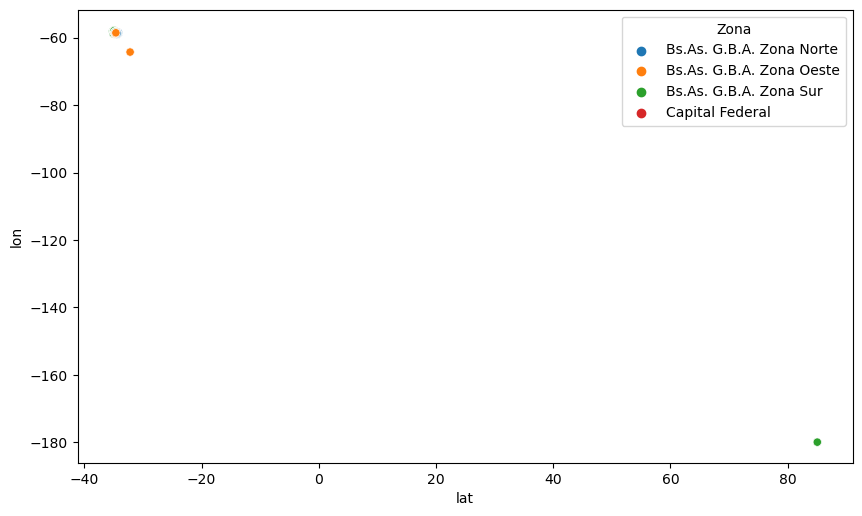

In [613]:
fig, scatter = plt.subplots(figsize = (10,6), dpi = 100)

scatter = sns.scatterplot(data=dfs,
                #.loc[ propiedades_filtro.precio_m2 < 1000 ,:],
                x = 'lat', y = 'lon', 
                hue="Zona",
                # s=50, 
                #cmap='Spectral'
                )
# scatter.set_xlim(left=-35.2, right=-34.235)
# scatter.set_ylim(bottom=-57.5, top=-59.2)

In [614]:
res = (dfs.lat <-35.2) | (dfs.lat > -34.235)

dfs.loc[res, ['lat','lon']] = np.nan

res = (dfs.lon <-59.2) | (dfs.lon > -57.5)

dfs.loc[res, ['lat','lon']] = np.nan

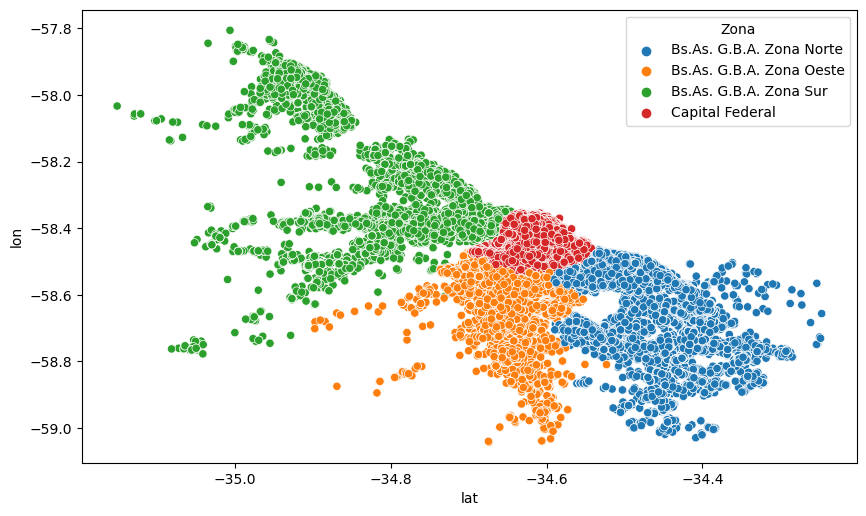

In [615]:
fig, scatter = plt.subplots(figsize = (10,6), dpi = 100)

scatter = sns.scatterplot(data=dfs,
                #.loc[ propiedades_filtro.precio_m2 < 1000 ,:],
                x = 'lat', y = 'lon', 
                hue="Zona",
                # s=50, 
                #cmap='Spectral'
                )

###### dataset final

In [616]:
print(df.shape)
print(dfs.shape)
print(df.shape[0] - dfs.shape[0])

df = dfs.copy()
# print(df.shape)
df.describe()

(143145, 11)
(143145, 11)
0


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,133544.000000,133513.000000,139934.000000,138030.000000,134851.000000,118048.000000,117789.000000,135623.000000
mean,-34.605097,-58.462785,2.994412,1.898718,1.507456,120.250195,81.873163,191644.242252
std,0.097331,0.139376,1.193072,0.987317,0.708983,150.578981,55.172847,112886.373879
min,-35.150806,-59.042416,1.000000,0.000000,1.000000,18.000000,1.000000,28000.000000
25%,-34.626424,-58.503244,2.000000,1.000000,1.000000,51.000000,46.000000,110000.000000
50%,-34.600658,-58.443272,3.000000,2.000000,1.000000,75.000000,65.000000,160000.000000
75%,-34.574322,-58.408278,4.000000,3.000000,2.000000,122.000000,99.000000,245000.000000
max,-34.247143,-57.805832,7.000000,5.000000,4.000000,1420.000000,415.000000,679000.000000


##### 2. Impuntacion de datos:

Verificamos la cantidad de datos faltantes por cada una de las variables

In [617]:
# df.dropna(inplace=True)

In [618]:
df.isna().sum() * 100 / df.isna().count()

lat                 6.707185
lon                 6.728841
Zona                0.000000
Barrio              0.000000
rooms               2.243180
bedrooms            3.573300
bathrooms           5.794125
surface_total      17.532572
surface_covered    17.713507
price               5.254812
property_type       0.000000
dtype: float64

Como podemos observar las variables que no poseen valores Faltantes son: "Zona ", "Barrio" y "property_type", por lo que trataremos de realizar todas las imputaciones en base a estas mismas. 


###### Imputacion de valores con property_type

###### Imputacion LAT y LON

Los valores faltantes de estas dos variables serás imputados por las medias obtenidas por los barrios a que pertenecen.


In [619]:
media_lat = df[["lat","Barrio"]].groupby("Barrio").agg(pd.Series.mean)
media_lat = media_lat.to_dict()["lat"]

media_lon = df[["lon","Barrio"]].groupby("Barrio").agg(pd.Series.mean)
media_lon = media_lon.to_dict()["lon"]

# df.dropna(subset=["lon","lat"], inplace=True)

In [620]:
df.isna().sum() * 100 / df.isna().count()

lat                 6.707185
lon                 6.728841
Zona                0.000000
Barrio              0.000000
rooms               2.243180
bedrooms            3.573300
bathrooms           5.794125
surface_total      17.532572
surface_covered    17.713507
price               5.254812
property_type       0.000000
dtype: float64

In [621]:
df.set_index("Barrio", inplace=True)

In [622]:
df.lat.fillna(media_lat, inplace=True)

df.lon.fillna(media_lon, inplace=True)

In [623]:
df.reset_index(inplace=True)

In [624]:
df.isna().sum() * 100 / df.isna().count()

Barrio              0.000000
lat                 0.000000
lon                 0.000000
Zona                0.000000
rooms               2.243180
bedrooms            3.573300
bathrooms           5.794125
surface_total      17.532572
surface_covered    17.713507
price               5.254812
property_type       0.000000
dtype: float64

In [625]:
df.shape

(143145, 11)

In [626]:
moda_bedrooms = df[["bedrooms","rooms"]].groupby("rooms").agg(pd.Series.mode)
moda_bedrooms = moda_bedrooms.to_dict()["bedrooms"]

moda_rooms = df[["rooms","bedrooms"]].groupby("bedrooms").agg(pd.Series.mode)
moda_rooms = moda_rooms.to_dict()["rooms"]


df.set_index("rooms", inplace=True)
df.bedrooms.fillna(moda_bedrooms, inplace=True)
df.reset_index(inplace=True)

df.set_index("bedrooms", inplace=True)
df.rooms.fillna(moda_rooms, inplace=True)
df.reset_index(inplace=True)




# media_lon = df[["lon","Barrio"]].groupby("Barrio").agg(pd.Series.mean)
# media_lon = media_lon.to_dict()["lon"]

# df.dropna(subset=["lon","lat"], inplace=True)

In [627]:
df.isna().sum() * 100 / df.isna().count()

bedrooms            1.386007
rooms               1.386007
Barrio              0.000000
lat                 0.000000
lon                 0.000000
Zona                0.000000
bathrooms           5.794125
surface_total      17.532572
surface_covered    17.713507
price               5.254812
property_type       0.000000
dtype: float64

In [628]:
df.shape

(143145, 11)

###### Imputacion surface_total y surface_covered

In [629]:
df.dropna(subset=["rooms","bedrooms"], inplace=True)
# df.dropna(subset=["bedrooms"], inplace=True)

In [630]:
df.isna().sum() * 100 / df.isna().count()

bedrooms            0.000000
rooms               0.000000
Barrio              0.000000
lat                 0.000000
lon                 0.000000
Zona                0.000000
bathrooms           5.348503
surface_total      16.895601
surface_covered    16.955816
price               4.630174
property_type       0.000000
dtype: float64

In [631]:
df.surface_covered.fillna(df.surface_total, inplace=True)
df.surface_total.fillna(df.surface_covered, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141161 entries, 0 to 143144
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bedrooms         141161 non-null  float64
 1   rooms            141161 non-null  float64
 2   Barrio           141161 non-null  object 
 3   lat              141161 non-null  float64
 4   lon              141161 non-null  float64
 5   Zona             141161 non-null  object 
 6   bathrooms        133611 non-null  float64
 7   surface_total    119636 non-null  float64
 8   surface_covered  119636 non-null  float64
 9   price            134625 non-null  float64
 10  property_type    141161 non-null  object 
dtypes: float64(8), object(3)
memory usage: 12.9+ MB


In [632]:
df.isna().sum() * 100 / df.isna().count()

bedrooms            0.000000
rooms               0.000000
Barrio              0.000000
lat                 0.000000
lon                 0.000000
Zona                0.000000
bathrooms           5.348503
surface_total      15.248546
surface_covered    15.248546
price               4.630174
property_type       0.000000
dtype: float64

In [633]:
# df['rooms-property_type'] = str(df['rooms']) + str(df['property_type'].index)
df['rooms-property_type'] = df.rooms.map(str) + " " + df.property_type



In [634]:
media_surface_total = df[["surface_total",'rooms-property_type']].groupby('rooms-property_type').agg(pd.Series.mean)
media_surface_total = media_surface_total.to_dict()["surface_total"]
# media_surface_total

media_surface_covered = df[["surface_covered",'rooms-property_type']].groupby('rooms-property_type').agg(pd.Series.mean)
media_surface_covered = media_surface_covered.to_dict()["surface_covered"]
# media_surface_covered

In [635]:
# df.reset_index(inplace=True)
# df.head()
df.set_index("rooms-property_type", inplace=True)
df.surface_total.fillna(media_surface_total, inplace=True)
df.surface_covered.fillna(media_surface_covered, inplace=True)
df.reset_index(inplace=True)

In [636]:
df.isna().sum() * 100 / df.isna().count()

rooms-property_type    0.000000
bedrooms               0.000000
rooms                  0.000000
Barrio                 0.000000
lat                    0.000000
lon                    0.000000
Zona                   0.000000
bathrooms              5.348503
surface_total          0.000000
surface_covered        0.000000
price                  4.630174
property_type          0.000000
dtype: float64

###### Imputacion bathrooms por "rooms-property_type-bedrooms"

In [637]:
df['rooms-property_type-bedrooms'] = df.rooms.map(str) + " " + df.bedrooms.map(str) + " " + df.property_type

media_bathrooms = df[["bathrooms",'rooms-property_type-bedrooms']].groupby('rooms-property_type-bedrooms').agg(pd.Series.mean)
media_bathrooms = media_bathrooms.to_dict()["bathrooms"]

df.set_index("rooms-property_type-bedrooms", inplace=True)
df.bathrooms.fillna(media_bathrooms, inplace=True)
df.reset_index(inplace=True)

In [638]:
df.isna().sum() * 100 / df.isna().count()

rooms-property_type-bedrooms    0.000000
rooms-property_type             0.000000
bedrooms                        0.000000
rooms                           0.000000
Barrio                          0.000000
lat                             0.000000
lon                             0.000000
Zona                            0.000000
bathrooms                       0.000000
surface_total                   0.000000
surface_covered                 0.000000
price                           4.630174
property_type                   0.000000
dtype: float64

In [639]:
df.describe()

,bedrooms,rooms,lat,lon,bathrooms,surface_total,surface_covered,price
count,141161.000000,141161.000000,141161.000000,141161.000000,141161.000000,141161.000000,141161.000000,134625.000000
mean,1.943752,3.005292,-34.602071,-58.466211,1.515624,123.206739,86.837163,190645.476821
std,1.022049,1.198803,0.100281,0.141513,0.699012,145.486746,71.860390,112097.712177
min,0.000000,1.000000,-35.150806,-59.042416,1.000000,1.000000,1.000000,28000.000000
25%,1.000000,2.000000,-34.625592,-58.509161,1.000000,52.004530,45.844448,110000.000000
50%,2.000000,3.000000,-34.599659,-58.444237,1.000000,78.000000,68.000000,160000.000000
75%,3.000000,4.000000,-34.571170,-58.409160,2.000000,127.000000,105.142004,242000.000000
max,5.000000,7.000000,-34.247143,-57.805832,4.000000,1420.000000,1410.000000,679000.000000


###### Eliminacion de valores faltantes

Ya se imputaron todas las variables a excepción de la variable objetivo, de la cual se decidió eliminar los valores faltantes.


In [640]:
df.dropna(inplace=True)

In [641]:
df.shape

(134625, 13)

In [642]:
df.head()

,rooms-property_type-bedrooms,rooms-property_type,bedrooms,rooms,Barrio,lat,lon,Zona,bathrooms,surface_total,surface_covered,price,property_type
0,3.0 2.0 Casa,3.0 Casa,2.0,3.0,Tigre,-34.415887,-58.624451,Bs.As. G.B.A. Zona Norte,2.0,89.0,79.0,219000.0,Casa
1,3.0 2.0 Casa,3.0 Casa,2.0,3.0,Ituzaingó,-34.630374,-58.707596,Bs.As. G.B.A. Zona Oeste,1.0,292.0,90.0,110000.0,Casa
2,7.0 3.0 Casa,7.0 Casa,3.0,7.0,La Plata,-34.871555,-58.025476,Bs.As. G.B.A. Zona Sur,2.0,325.0,325.0,120000.0,Casa
3,7.0 3.0 Casa,7.0 Casa,3.0,7.0,La Plata,-34.882295,-58.028515,Bs.As. G.B.A. Zona Sur,3.0,1023.0,360.0,650000.0,Casa
4,6.0 3.0 Casa,6.0 Casa,3.0,6.0,San Isidro,-34.497341,-58.567165,Bs.As. G.B.A. Zona Norte,3.0,1000.0,190.0,370000.0,Casa


In [643]:
dfs.shape

(143145, 11)

##### 3. **Encoding**

###### Tipo de propiedad

In [644]:
# dicc = {"Casa": 3, "PH": 2, "Departamento": 1}
# df.property_type = df.property_type.map(dicc)


df = pd.get_dummies(df, columns=["property_type"])

In [645]:
df.head()

,rooms-property_type-bedrooms,rooms-property_type,bedrooms,rooms,Barrio,lat,lon,Zona,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,3.0 2.0 Casa,3.0 Casa,2.0,3.0,Tigre,-34.415887,-58.624451,Bs.As. G.B.A. Zona Norte,2.0,89.0,79.0,219000.0,1,0,0
1,3.0 2.0 Casa,3.0 Casa,2.0,3.0,Ituzaingó,-34.630374,-58.707596,Bs.As. G.B.A. Zona Oeste,1.0,292.0,90.0,110000.0,1,0,0
2,7.0 3.0 Casa,7.0 Casa,3.0,7.0,La Plata,-34.871555,-58.025476,Bs.As. G.B.A. Zona Sur,2.0,325.0,325.0,120000.0,1,0,0
3,7.0 3.0 Casa,7.0 Casa,3.0,7.0,La Plata,-34.882295,-58.028515,Bs.As. G.B.A. Zona Sur,3.0,1023.0,360.0,650000.0,1,0,0
4,6.0 3.0 Casa,6.0 Casa,3.0,6.0,San Isidro,-34.497341,-58.567165,Bs.As. G.B.A. Zona Norte,3.0,1000.0,190.0,370000.0,1,0,0


###### Barrios y Zona

Para los barrios, primero vamos a obtener el precio por m2 total de la propiedad y obtenemos la media por barrios, para posteriormente separar en 5 partes iguales.

In [646]:
df["m2"]  = df.price / df.surface_total 

media = df[["m2","Barrio"]].groupby("Barrio").agg(pd.Series.mean)
media = media.to_dict()["m2"]
media

{'Abasto': 2407.5664208643675,
 'Agronomía': 3539.0021029393642,
 'Almagro': 2474.5630562519214,
 'Almirante Brown': 1120.0261872566448,
 'Avellaneda': 1406.989310371866,
 'Balvanera': 2049.869989567388,
 'Barracas': 2322.1549379370776,
 'Barrio Norte': 3099.9554916079314,
 'Belgrano': 3224.3160764802456,
 'Berazategui': 1255.928523047159,
 'Boca': 1695.815759119429,
 'Boedo': 2049.566989779623,
 'Caballito': 2592.521054094855,
 'Catalinas': 2040.9733736118492,
 'Cañuelas': 829.985348408954,
 'Centro / Microcentro': 2309.7756025539807,
 'Chacarita': 2435.6797298701226,
 'Coghlan': 2777.4962091300954,
 'Colegiales': 2721.149417320406,
 'Congreso': 2145.4821628140385,
 'Constitución': 1671.9048966896023,
 'Escobar': 857.8253116640232,
 'Esteban Echeverría': 817.0298808945565,
 'Ezeiza': 1033.2425340855625,
 'Florencio Varela': 811.9452072043665,
 'Flores': 2105.0328031055656,
 'Floresta': 1770.2119639674636,
 'General Rodríguez': 699.3742551768128,
 'General San Martín': 1259.57875475123

In [647]:
df.Barrio = df.Barrio.map(media)
df.drop(columns=['m2'], inplace=True)
df.head()

,rooms-property_type-bedrooms,rooms-property_type,bedrooms,rooms,Barrio,lat,lon,Zona,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,3.0 2.0 Casa,3.0 Casa,2.0,3.0,2429.519167,-34.415887,-58.624451,Bs.As. G.B.A. Zona Norte,2.0,89.0,79.0,219000.0,1,0,0
1,3.0 2.0 Casa,3.0 Casa,2.0,3.0,929.168194,-34.630374,-58.707596,Bs.As. G.B.A. Zona Oeste,1.0,292.0,90.0,110000.0,1,0,0
2,7.0 3.0 Casa,7.0 Casa,3.0,7.0,1203.208709,-34.871555,-58.025476,Bs.As. G.B.A. Zona Sur,2.0,325.0,325.0,120000.0,1,0,0
3,7.0 3.0 Casa,7.0 Casa,3.0,7.0,1203.208709,-34.882295,-58.028515,Bs.As. G.B.A. Zona Sur,3.0,1023.0,360.0,650000.0,1,0,0
4,6.0 3.0 Casa,6.0 Casa,3.0,6.0,2508.327348,-34.497341,-58.567165,Bs.As. G.B.A. Zona Norte,3.0,1000.0,190.0,370000.0,1,0,0


In [648]:
df["Barrio"] = pd.qcut(df.Barrio,5,labels=["g1","g2","g3","g4","g5"])
# df["Barrio"]
df.head()

,rooms-property_type-bedrooms,rooms-property_type,bedrooms,rooms,Barrio,lat,lon,Zona,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,3.0 2.0 Casa,3.0 Casa,2.0,3.0,g3,-34.415887,-58.624451,Bs.As. G.B.A. Zona Norte,2.0,89.0,79.0,219000.0,1,0,0
1,3.0 2.0 Casa,3.0 Casa,2.0,3.0,g1,-34.630374,-58.707596,Bs.As. G.B.A. Zona Oeste,1.0,292.0,90.0,110000.0,1,0,0
2,7.0 3.0 Casa,7.0 Casa,3.0,7.0,g1,-34.871555,-58.025476,Bs.As. G.B.A. Zona Sur,2.0,325.0,325.0,120000.0,1,0,0
3,7.0 3.0 Casa,7.0 Casa,3.0,7.0,g1,-34.882295,-58.028515,Bs.As. G.B.A. Zona Sur,3.0,1023.0,360.0,650000.0,1,0,0
4,6.0 3.0 Casa,6.0 Casa,3.0,6.0,g4,-34.497341,-58.567165,Bs.As. G.B.A. Zona Norte,3.0,1000.0,190.0,370000.0,1,0,0


In [649]:
df = pd.get_dummies(df, columns=["Barrio","Zona"])


# df.Barrio = df.Barrio.map(media)
# df.drop(columns=['m2'], inplace=True)

# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder(categories=[df.Barrio.value_counts().iloc[:].index])
# encoder.fit(df[["Barrio"]])
# df["Barrio"] = encoder.transform(df[["Barrio"]])



In [650]:
df.head()

,rooms-property_type-bedrooms,rooms-property_type,bedrooms,rooms,lat,lon,bathrooms,surface_total,surface_covered,price,...,property_type_PH,Barrio_g1,Barrio_g2,Barrio_g3,Barrio_g4,Barrio_g5,Zona_Bs.As. G.B.A. Zona Norte,Zona_Bs.As. G.B.A. Zona Oeste,Zona_Bs.As. G.B.A. Zona Sur,Zona_Capital Federal
0,3.0 2.0 Casa,3.0 Casa,2.0,3.0,-34.415887,-58.624451,2.0,89.0,79.0,219000.0,...,0,0,0,1,0,0,1,0,0,0
1,3.0 2.0 Casa,3.0 Casa,2.0,3.0,-34.630374,-58.707596,1.0,292.0,90.0,110000.0,...,0,1,0,0,0,0,0,1,0,0
2,7.0 3.0 Casa,7.0 Casa,3.0,7.0,-34.871555,-58.025476,2.0,325.0,325.0,120000.0,...,0,1,0,0,0,0,0,0,1,0
3,7.0 3.0 Casa,7.0 Casa,3.0,7.0,-34.882295,-58.028515,3.0,1023.0,360.0,650000.0,...,0,1,0,0,0,0,0,0,1,0
4,6.0 3.0 Casa,6.0 Casa,3.0,6.0,-34.497341,-58.567165,3.0,1000.0,190.0,370000.0,...,0,0,0,0,1,0,1,0,0,0


###### drop columnas

In [651]:
df.drop(columns=['rooms-property_type-bedrooms', 'rooms-property_type'], inplace=True)

# df.drop(columns=['index', 'rooms-property_type_bedrooms', 'rooms-property_type','departamento',"Barrio"], inplace=True)
# df.drop(columns=['index', 'rooms-property_type_bedrooms', 'rooms-property_type','departamento',"Barrio",'property_type_Casa',	'property_type_Departamento',	'property_type_PH'], inplace=True)
# df.drop(columns=['index', 'rooms-property_type_bedrooms', 'rooms-property_type',"Barrio",'property_type','departamento'], inplace=True)

In [652]:
df.shape

(134625, 20)

##### 4. **Escalado de los datos**

In [653]:
from sklearn.preprocessing import StandardScaler

In [654]:
X = df.drop(columns=["price"])
col = X.columns
y = df.price
# X.drop(columns=["m2", "index"], inplace=True)

In [655]:
X = pd.DataFrame(X)
X.columns = col

In [656]:
X.head()

,bedrooms,rooms,lat,lon,bathrooms,surface_total,surface_covered,property_type_Casa,property_type_Departamento,property_type_PH,Barrio_g1,Barrio_g2,Barrio_g3,Barrio_g4,Barrio_g5,Zona_Bs.As. G.B.A. Zona Norte,Zona_Bs.As. G.B.A. Zona Oeste,Zona_Bs.As. G.B.A. Zona Sur,Zona_Capital Federal
0,2.0,3.0,-34.415887,-58.624451,2.0,89.0,79.0,1,0,0,0,0,1,0,0,1,0,0,0
1,2.0,3.0,-34.630374,-58.707596,1.0,292.0,90.0,1,0,0,1,0,0,0,0,0,1,0,0
2,3.0,7.0,-34.871555,-58.025476,2.0,325.0,325.0,1,0,0,1,0,0,0,0,0,0,1,0
3,3.0,7.0,-34.882295,-58.028515,3.0,1023.0,360.0,1,0,0,1,0,0,0,0,0,0,1,0
4,3.0,6.0,-34.497341,-58.567165,3.0,1000.0,190.0,1,0,0,0,0,0,1,0,1,0,0,0


In [657]:
escalador = StandardScaler()
# escalador.fit(X)

In [658]:
X_escalado = escalador.fit_transform(X)
# X_escalado = X
X_escalado
type(X_escalado)

numpy.ndarray

### c) Evaluar modelo de Sprint 01

In [659]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error

#### Funciones

##### Función para crear y evaluar los modelos.

In [660]:
def probar_modelos(X_train, X_test, y_train, y_test,
                   tree_regressor = False, knn_regressor =False, 
                   depth_o_neighbors = [1,2,3,4,5,6,7,8,9,10,15,20,25]):

    
    if tree_regressor == True and knn_regressor == True:
        modelos = ['Árbol de Decisión', 'Vecinos más cercanos']
#         models = [model_tree_regressor, model_knn_regressor]
    elif tree_regressor == True:
        modelos = ['Árbol de Decisión']       
#         models = [model_tree_regressor]
        
    elif knn_regressor == True:
        modelos = ['Vecinos más cercanos']
#         models = [model_knn_regressor]
    else:
        modelos = []
        
        
    for i, modelo in enumerate(modelos):
        print(f'Modelo: {modelos[i]}')

        lista_rmse_train = []
        lista_rmse_test = []
        lista_r2_train = []
        lista_r2_test = []
        lista_r2a_train = []
        lista_r2a_test = []

        

        for i in depth_o_neighbors:
            
            if modelo == 'Árbol de Decisión':
                model = DecisionTreeRegressor(max_depth = i, random_state=42)
            else: #modelos == 'Árbol de Decisión':
                model = KNeighborsRegressor(n_neighbors = i)
                  
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
            y_test_pred = model.predict(X_test)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
            lista_rmse_train.append(train_rmse)
            lista_rmse_test.append(test_rmse)
            yhat = model.predict(X_train)
            SS_Residual = sum((y_train-yhat)**2)       
            SS_Total = sum((y_train-np.mean(y_train))**2)     
            r_squared = 1 - (float(SS_Residual))/SS_Total
            adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    #         print(f'R 2 en Train: {r_squared}', " ",f'R 2 ajustado en Train: {adjusted_r_squared}')
            lista_r2_train.append(r_squared)
            lista_r2a_train.append(adjusted_r_squared)    
            yhat = model.predict(X_test)
            SS_Residual = sum((y_test-yhat)**2)       
            SS_Total = sum((y_test-np.mean(y_test))**2)     
            r_squared = 1 - (float(SS_Residual))/SS_Total
            adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    #         print(f'R 2 en Test: {r_squared}', " ",f'R 2 ajustado en Test: {adjusted_r_squared}')
            lista_r2_test.append(r_squared)
            lista_r2a_test.append(adjusted_r_squared)     

        plt.figure(figsize = (12,5))

        plt.subplot(1,2,1)
        plt.plot(depth_o_neighbors, lista_rmse_train,'o-',label='train' )
        plt.plot(depth_o_neighbors, lista_rmse_test,'o-',label='test')
        plt.grid(True)
        plt.legend()
        if modelo == 'Árbol de Decisión':
            plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
        else: #modelos == 'Árbol de Decisión':
            plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
        plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
        plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
        plt.title("Rmse", fontsize = 18, color = "b")
#         plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

        plt.subplot(1,2,2)
        plt.plot(depth_o_neighbors, lista_r2_train,'o-',label='train' )
        plt.plot(depth_o_neighbors, lista_r2_test,'o-',label='test')
        plt.grid(True)
        plt.legend()
        if modelo == 'Árbol de Decisión':
            plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
        else: #modelos == 'Árbol de Decisión':
            plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
        plt.ylabel("R2", fontweight = "black", fontsize = 12)
        plt.title("R 2", fontsize = 18, color = "b")

#         plt.subplot(1,3,3)
#         plt.plot(depth_o_neighbors, lista_r2a_train,'o-',label='train' )
#         plt.plot(depth_o_neighbors, lista_r2a_test,'o-',label='test')
#         plt.grid(True)
#         plt.legend()
#         if modelo == 'Árbol de Decisión':
#             plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
#         else: #modelos == 'Árbol de Decisión':
#             plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
#         plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
#         plt.title("R 2 ajustado", fontsize = 18, color = "b")
        plt.show() 

In [661]:
def Aplicar_modelo(X_train, X_test, y_train, y_test, X,modelo, 
                   
                    descrip = "", Hparam ="", Cant_Var = "",#modelo ya creado
                   
#                    tree_regressor = False,max_depth=3, #Arbol de decisión  
#                    knn_regressor = False, n_neighbors=5, #Vecino más cercano
                   
                   importances = False): #calculó la importancia de cada variable en el modelo (Arbol)


#     if tree_regressor == True and knn_regressor == True:
#         model_tree_regressor = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
#         model_knn_regressor = KNeighborsRegressor(n_neighbors=5)
#         models = [model_tree_regressor, model_knn_regressor]
#     elif tree_regressor == True:
#         model_tree_regressor = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
#         models = [model_tree_regressor]
        
#     elif knn_regressor == True:
#         model_knn_regressor = KNeighborsRegressor(n_neighbors= n_neighbors)
#         models = [model_knn_regressor]
#     else:
#         models = []
        
        
#     for i, modelo in enumerate(models):

        # if type(modelo).__name__ == 'DecisionTreeRegressor':
        #     print('Modelo: Árbol de Decisión')
        #     modelos = "Árbol"       
        #     Hparam = "Profundidad " +str(Hparam)

        # elif type(modelo).__name__ == 'KNeighborsRegressor':    
        #     print('Modelo: Vecinos más cercanos')
        #     Hparam = str(Hparam) +" Vecinos"
        #     modelos = "KNN"



        
        modelo.fit(X_train, y_train)
        y_train_pred = modelo.predict(X_train)
        y_test_pred = modelo.predict(X_test)

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        # print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
        # print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

        yhat = modelo.predict(X_train)
        SS_Residual = sum((y_train-yhat)**2)       
        SS_Total = sum((y_train-np.mean(y_train))**2)     
        r_squared_train = 1 - (float(SS_Residual))/SS_Total
        # print(f'R 2 en Train: {r_squared_train}')
        # Calculo de mae 
        mae_train = mean_absolute_error(y_train,y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        # print(f'MAE Train: {mae_train}\n')
        # print(f'MAE Test: {mae_test}\n')

        yhat = modelo.predict(X_test)
        SS_Residual = sum((y_test-yhat)**2)       
        SS_Total = sum((y_test-np.mean(y_test))**2)     
        r_squared_test = 1 - (float(SS_Residual))/SS_Total
        # print(f'R 2 en Test: {r_squared_test}')

        # if type(modelo).__name__ == 'DecisionTreeRegressor':
        plt.figure(figsize = (17,12))
        # G = gridspec.GridSpec(3 , 2)
    #     else:
    #         plt.figure(figsize = (17,11))
    #         G = gridspec.GridSpec(1 , 2)
    #     plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")
        G = gridspec.GridSpec(2 , 2)

        axes_1 = plt.subplot(G[0, 0])
    #     plt.subplot(1,3,1)
        sns.histplot(y_train - y_train_pred, bins = 30,color="red", label = 'train',stat = 'density', kde=True, alpha=0.8)
        sns.histplot(y_test - y_test_pred, bins = 30,color="skyblue", label = 'test',stat = 'density', kde=True, alpha=0.8)
        plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.05)
        plt.xlabel("Errores", fontweight = "black", fontsize = 12)
        plt.xticks(rotation = 0, horizontalalignment="right")
        plt.legend()
    #     plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.05)

        axes_1 = plt.subplot(G[0, 1])
    #     plt.subplot(1,3,2)
        plt.scatter(x = y_test, y = y_test_pred, s=1) 
        plt.title("Gráfico de dispersión de 'y' vs 'y-predicho' (Test))", fontsize = 18, color = "b", y =1.05)
        plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
        plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)
        plt.xticks(rotation = 0, horizontalalignment="right")
    #     plt.title("Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "b", y = 1.05)



        # tabla_errores = pd.concat([
        #     pd.DataFrame({
        #     'Tipo_error': "Entrenamiento",
        #     'Error': y_train - y_train_pred
        #     }), 
        #     pd.DataFrame({
        #     'Tipo_error': "Test",
        #     'Error': y_test - y_test_pred
        #     })
        # ])
        
        
        # #boxplot de los errores (y - y_predicho) para cada conjunto:
        # axes_1 = plt.subplot(G[1, :])
        # # plt.figure(figsize = (5,10))
        # # plt.subplot(1,1,1)
        
        # sns.violinplot(
        #             x= 'Error', y = "Tipo_error", data=tabla_errores)
        #             # inner="quartile")
        # plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.01)
        # plt.xlabel("y (test)", fontweight = "black", fontsize = 12)     
        # plt.ylabel("y_pred (test)", fontweight = "black", fontsize = 12)
        # # plt.show()

   

        

        



        if type(modelo).__name__ != 'KNeighborsRegressor' and importances == True:
            axes_1 = plt.subplot(G[1, :])
            # plt.subplot(1,2,3)
            importances = modelo.feature_importances_
            columns = X.columns
            orden_columns = pd.DataFrame({"feature": X.columns, "importancia": modelo.feature_importances_}).sort_values("importancia", ascending=False).feature

            sns.barplot(x = columns, y = importances,
                order =orden_columns, 
                alpha=0.8)
            plt.xlabel("Variables", fontweight = "black", fontsize = 12)
            plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "b")
            plt.xticks(rotation=90, size=10)
        plt.show()    
        



        
        df = pd.DataFrame({ "Descripción":[descrip],
                                      # "Modelo": [modelos], 
                                      "Hparam": [Hparam],
                                      "Cant Instancias": [X.shape[0]],
                                      "Cant Variables": [X_train.shape[1]],
                                      "rmse_train": [rmse_train],
                                      "rmse_test": [rmse_test],
                                      "MAE Train": [mae_train],
                                      "MAE Test": [mae_test],
                                      "R2_train": [r_squared_train],
                                      "R2_test":  [r_squared_test]})
        return df , modelo        

In [662]:
def model_ev2(models, X_train, X_test, y_train, y_test):

  global mae_train, mae_test, y_test_pred,y_train_pred, res_models

  res_models = []

  for model in models:

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train) 
    y_test_pred = model.predict(X_test)
    mae_train = mean_absolute_error(y_train,y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    dataf = pd.DataFrame({
                        "Modelo": [model], 
                        "mae_train":[mae_train],
                        "mae_test":[mae_test],
                        })
    res_models.append(dataf)

  final = pd.DataFrame(np.concatenate(res_models), columns=["Modelo","mae_train","mae_test"])
  final.sort_values("mae_test",inplace=True)
  final.reset_index(drop=True, inplace=True)
  return final

In [663]:
def eval_model_CV (model, descr, Hparam, X_, y_train, folds): 
    
    
    resultado = cross_validate(model,
                               X_,
                               y_train, 
                               cv = folds, 
                               scoring = ['neg_root_mean_squared_error','neg_mean_absolute_error','r2'],
                               return_train_score= True,
                               return_estimator= True
                            #    ,n_jobs=8
                               )
                               
                               
    rmse_test = np.mean(resultado['test_neg_root_mean_squared_error']*-1)
    rmse_train = np.mean(resultado['train_neg_root_mean_squared_error']*-1)

    mae_test = np.mean(resultado['test_neg_mean_absolute_error']*-1)
    mae_train = np.mean(resultado['train_neg_mean_absolute_error']*-1)


    r_squared_test = np.mean(resultado['test_r2'])
    r_squared_train = np.mean(resultado['train_r2'])
  
    # if type(model).__name__ != 'KNeighborsRegressor' and importances == True:
    #     axes_1 = plt.subplot(G[2, :])
    #     # plt.subplot(1,2,3)
    #     importances = model.feature_importances_
    #     columns = X.columns
    #     orden_columns = pd.DataFrame({"feature": X.columns, "importancia": model.feature_importances_}).sort_values("importancia", ascending=False).feature

    #     sns.barplot(x = columns, y = importances,
    #         order =orden_columns, 
    #         alpha=0.8)
    #     plt.xlabel("Variables", fontweight = "black", fontsize = 12)
    #     plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "b")
    #     plt.xticks(rotation=90, size=10)
    # plt.show() 

# 

    df = pd.DataFrame({ "Descripción":[descr],
                                      # "Modelo": [modelos], 
                                      "Hparam": [Hparam],
                                      "Cant Instancias": [X_.shape[0]],
                                      "Cant Variables": [X_.shape[1]],
                                      "rmse_train": [rmse_train],
                                      "rmse_test": [rmse_test],
                                      "MAE Train": [mae_train],
                                      "MAE Test": [mae_test],
                                      "R2_train": [r_squared_train],
                                      "R2_test":  [r_squared_test]})
    return df        

In [664]:
def predict_model_CV (model,  X_, y_train, folds):

    y_train_pred = cross_val_predict(model, X_, y_train, cv= folds, n_jobs=5)
    
    plt.figure(figsize = (17,19))
    G = gridspec.GridSpec(3 , 2)
#     else:
#         plt.figure(figsize = (17,11))
#         G = gridspec.GridSpec(1 , 2)
#     plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")
    # G = gridspec.GridSpec(3 , 2)

    axes_1 = plt.subplot(G[0, 0])
#     plt.subplot(1,3,1)
    sns.histplot(y_train - y_train_pred, bins = 30,color="red", label = 'train',stat = 'density', kde=True, alpha=0.8)
    plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.05)
    plt.xlabel("Errores", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 0, horizontalalignment="right")
    plt.legend()
#     plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.05)

    axes_1 = plt.subplot(G[0, 1])
#     plt.subplot(1,3,2)
    plt.scatter(x = y_train, y = y_train_pred, s=1) 
    plt.title("Gráfico de dispersión de 'y' vs 'y-predicho' (Test))", fontsize = 18, color = "b", y =1.05)
    plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 0, horizontalalignment="right")
#     plt.title("Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "b", y = 1.05)



    tabla_errores = pd.DataFrame({
        'Tipo_error': "Entrenamiento",
        'Error': y_train - y_train_pred})
    
    
    #boxplot de los errores (y - y_predicho) para cada conjunto:
    axes_1 = plt.subplot(G[1, :])
    # plt.figure(figsize = (5,10))
    # plt.subplot(1,1,1)
    
    sns.violinplot(
                x= 'Error', y = "Tipo_error", data=tabla_errores)
                # inner="quartile")
    plt.title("Histograma de los errores (y - y_predicho)", fontsize = 18, color = "b", y =1.01)
    plt.xlabel("y (test)", fontweight = "black", fontsize = 12)     
    plt.ylabel("y_pred (test)", fontweight = "black", fontsize = 12)
    # plt.show()



In [665]:
# X.shape[1]

In [666]:
# from sklearn.model_selection import train_test_split

#### Modelos
##### Nuevo modelo

In [667]:
df.shape

(134625, 20)

In [668]:
X.shape[1]

19

In [669]:
x_train, x_test, y_train, y_test = train_test_split(X_escalado, y, test_size = 0.2, random_state = 42)

Modelo: Árbol de Decisión


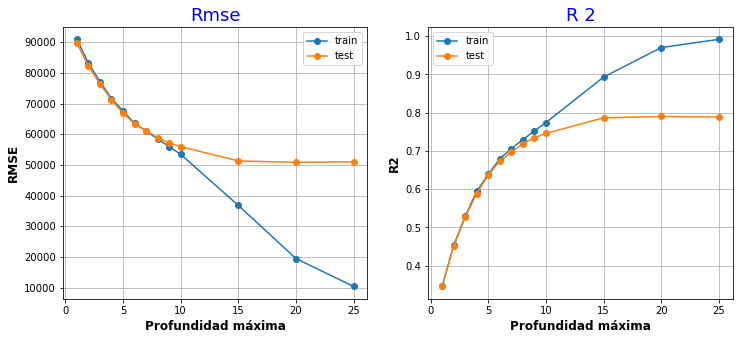

In [533]:
probar_modelos(x_train, x_test, y_train, y_test,
               tree_regressor = True, 
               knn_regressor =False)

In [534]:
tree = DecisionTreeRegressor(max_depth = 9, random_state = 42)

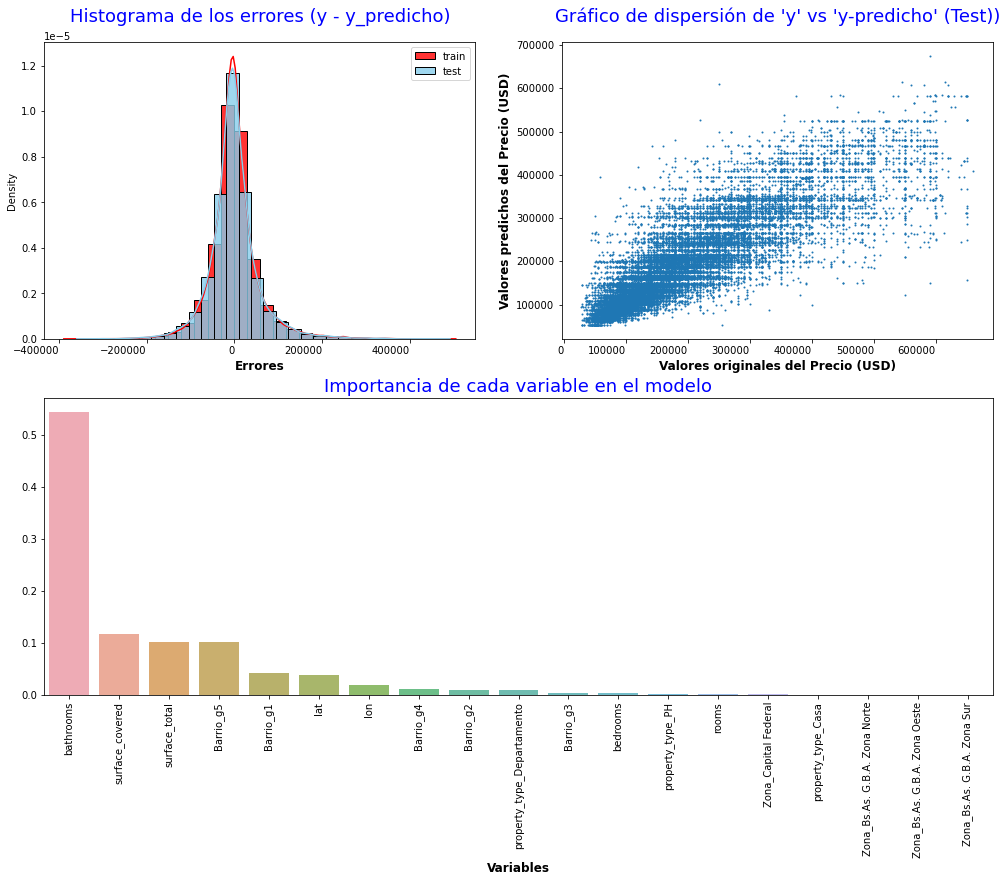

In [536]:
df_new_tree, modelo_tree_1 = Aplicar_modelo(x_train, x_test, y_train, y_test, X, tree,
                          descrip = "Sprint 01 con Transf", Hparam ={"max_depth=9"}, Cant_Var = "7",
                   importances = True)

In [85]:
df_new_tree

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Sprint 01 con Transf,{max_depth=9},134625,19,55949.356111,57170.982581,37503.218612,38321.707496,0.752186,0.734304


##### Antiguo modelo

In [87]:
df_anterior = dfcopia.loc[(dfcopia.l2 == 'Capital Federal') 
            & ((dfcopia.property_type == 'PH')|(dfcopia.property_type == 'Casa')|(dfcopia.property_type == 'Departamento')) 
            & (dfcopia.surface_total <= 1000) & (dfcopia.surface_total >= 15) & (dfcopia.price <= 4000000),
              ("lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price")]
df_anterior = df_anterior.dropna()
df_anterior.shape

(76771, 8)

In [88]:
X_ant = df_anterior[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]

y_ant = df_anterior["price"]

X_train_ant, X_test_ant, y_train_ant, y_test_ant = train_test_split(X_ant, y_ant, test_size = 0.30, random_state = 42)

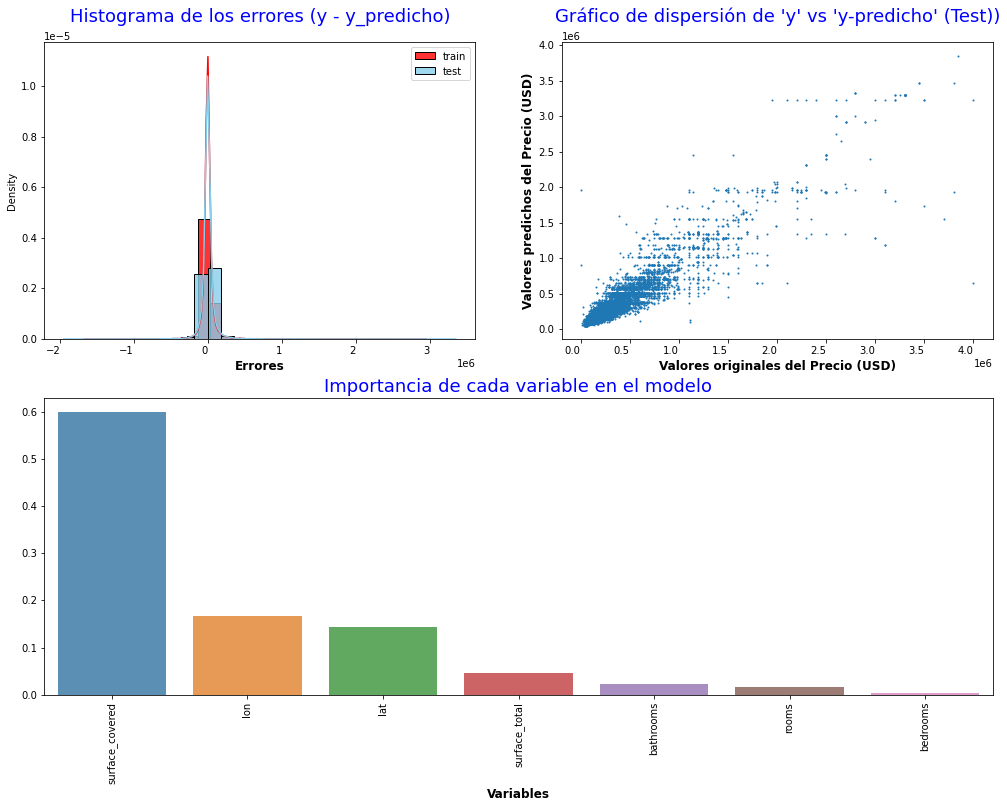

In [426]:
df_tree_ant, modelo_tree_ant= Aplicar_modelo(X_train_ant, X_test_ant, y_train_ant, y_test_ant, X_ant, tree, 
                          descrip = "Sprint 01", Hparam ={"max_depth=9"}, Cant_Var = "7",
                   importances = True)

In [90]:
df_tree_ant

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Sprint 01,{max_depth=9},76771,7,90406.99916,101347.237976,44844.401421,48035.54705,0.902535,0.867965


#### Evaluacion de desempeño

In [337]:
pd.concat([df_tree_ant.loc[:,"Descripción":"rmse_test"],
df_new_tree.loc[:,"Descripción":"rmse_test"]])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test
0,Sprint 01,{max_depth=9},76771,7,90406.999160,101347.237976
0,Sprint 01 con Transf,{max_depth=9},134625,19,55949.356111,57170.982581


Podemos observar una mejora en el desempeño considerable del modelo respecto al modelo implementado en el sprint 1, siendo de ~43% en la métrica utilizada (RMSE). Esto se debe al preprocesamiento de los datos, demostrando la importancia de su aplicación.

*la métrica elegida para evaluar los modelos es el RMSE, ya que es más sensible contra los outliers*

## Modelos Avanzados

Como modelos avanzados utilizaremos Random Forest y XGBOOST Regressor

### d.1) Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [428]:
# model = RandomForestRegressor(250, criterion="mse", max_depth= 12, max_features= 'auto')
model = RandomForestRegressor(random_state = 42)

In [429]:
rf_sin_opt = eval_model_CV (model, "Random Forest CV","",  x_train, y_train, 4)


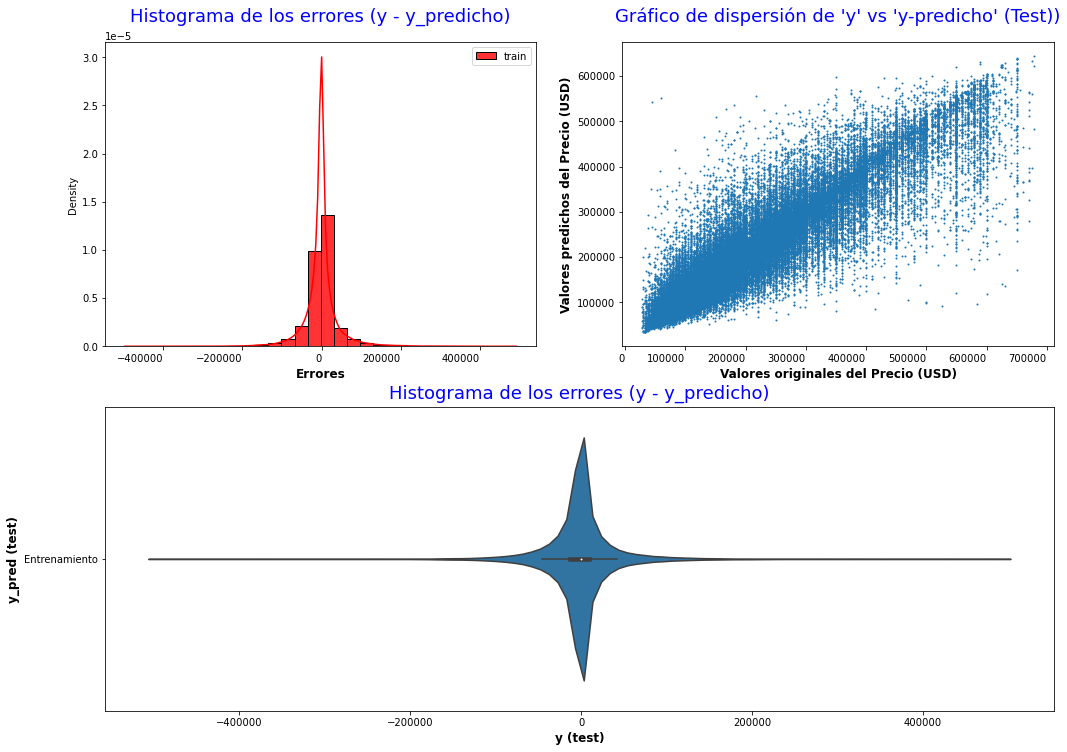

In [430]:
predict_model_CV (model,  x_train, y_train, 4)

In [101]:
rf_sin_opt

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Random Forest CV,,107700,19,17190.337442,42662.573283,9857.231217,23921.974222,0.976605,0.855886


#### e.1) Optimizacion HP

para optimizarlos hiperparametros realizamos un Random Search:

In [526]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =50, stop = 550, num = 6)]
# n_estimators = [200]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
max_features = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)]
max_features.append('sqrt')
# max_features = [4]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 5)]
# max_depth.append(None)
# max_depth = [8]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,20,50,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# min_samples_leaf = [1]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
bootstrap = [False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
print( len(n_estimators)*len(max_features)*len(max_depth)*len(min_samples_split)*len(min_samples_leaf)*len(bootstrap))

{'n_estimators': [50, 150, 250, 350, 450, 550], 'max_features': [2, 4, 6, 8, 10, 'sqrt'], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [2, 5, 10, 20, 50, 100], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [False]}
3240


In [527]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 15, 
                               cv = 4, 
                               verbose=2, 
                               random_state=42,
                               scoring = ['neg_mean_absolute_error','neg_root_mean_squared_error'],
                               refit='neg_mean_absolute_error',
                               return_train_score = True,
                               n_jobs = 8)
rf_random.fit(x_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=15, n_jobs=8,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': [2, 4, 6, 8, 10,
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 20, 50,
                                                              100],
                                        'n_estimators': [50, 150, 250, 350, 450,
                                                         550]},
                   random_state=42, refit='neg_mean_absolute_error',
                   return_train_score=True,
                   scoring=['neg_mean_absolute_error',
                            'neg_root_mean_squared_error'],
                   verbose=2)

In [528]:
rf_random.best_params_

{'n_estimators': 350,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 8,
 'max_depth': 25,
 'bootstrap': False}

evaluamos el modelo con los mejores hiperparmetros. 

In [92]:
rf = RandomForestRegressor( n_estimators = 350,
                            min_samples_split = 2,
                            min_samples_leaf = 1,
                            max_features = 8,
                            max_depth = 25,
                            bootstrap = False
                           ,n_jobs= 8
                           )
                     

In [93]:
rf_cv_opt = eval_model_CV (rf, "Random Forest CV Opt."
                        ,{'n_estimators': 350,
               'max_features': 8,
               'max_depth': 25,
               'min_samples_split': 2,
               'min_samples_leaf': 1,
               'bootstrap': True}
                        ,  x_train, y_train, 4)
rf_cv_opt

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Random Forest CV Opt.,"{'n_estimators': 350, 'max_features': 8, 'max_...",107700,19,8178.386205,41677.179176,3228.339733,21942.181299,0.994704,0.862465


Podemos observar podemos odservar una gran varancia en el modelo, que indica que tenemos un sobre entrenamientos.

In [532]:
pd.concat([rf_sin_opt,rf_cv_opt])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Random Forest CV,,107700,19,17190.337442,42662.573283,9857.231217,23921.974222,0.976605,0.855886
0,Random Forest CV Opt.,"{'n_estimators': 350, 'max_features': 8, 'max_...",107700,19,8175.845880,41672.507060,3225.547446,21933.284227,0.994707,0.862494


Comparando el modelo "Random Forest CV", generado con los parámetros con defecto, con el modelo obtenido por Random Search, podemos una gran mejoría la predicción en las instancias de entrenamiento, en las de Testeo no se tiene una mejoría considerable.

para obtener un modelo sin overfiting imprimimos los resultados contenidos en las iteraciones aplicadas por el Random Search

In [531]:
resultados = pd.DataFrame(rf_random.cv_results_)
resultados["RMSE_Train-RMSE_Test"] = resultados["mean_train_neg_mean_absolute_error"] - resultados["mean_test_neg_mean_absolute_error"]
resultados.sort_values('RMSE_Train-RMSE_Test', ascending = True)
resultados.filter(regex = '(param.*|mean_t|std_t|RMSE)') \
    .drop(columns = 'params') \
    .sort_values(['mean_test_neg_mean_absolute_error', "RMSE_Train-RMSE_Test"], ascending = False) \
    .tail(60)
    # .head(50)
    # .tail(60)
    # .head(50)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,RMSE_Train-RMSE_Test
14,350,2,1,8,25,False,-21926.610751,349.180648,-3229.686896,20.462912,-41640.311474,803.879696,-8178.201887,133.393873,18696.923854
7,350,5,1,6,20,False,-24176.075944,281.375939,-11656.779991,76.051766,-41920.732121,685.991558,-19000.653098,181.614581,12519.295953
13,350,2,2,sqrt,25,False,-24837.803210,266.095340,-13486.895123,43.205169,-42262.973528,650.771222,-22286.397774,121.939626,11350.908087
0,50,5,2,sqrt,25,False,-25159.675945,218.398967,-14183.311628,65.203000,-42654.568842,569.641256,-23414.684068,147.210819,10976.364317
12,550,5,4,4,20,False,-28274.441947,229.386137,-22031.935068,62.760810,-45199.620842,555.140483,-34597.946369,170.389572,6242.506879
6,50,20,1,8,15,False,-29457.613808,220.664144,-24302.506368,103.298055,-46479.790607,526.985264,-37269.257431,252.381933,5155.107440
11,50,5,4,4,15,False,-31060.677084,276.114648,-26986.310475,46.871641,-47902.891265,529.437802,-40962.864244,135.444873,4074.366609
5,250,100,2,10,25,False,-31545.426290,211.618796,-28634.609594,79.941311,-49393.285254,421.439087,-44666.956397,143.382915,2910.816697
3,250,10,2,10,10,False,-35137.494899,162.253693,-33594.603422,109.553993,-52797.079473,348.531474,-50074.552892,217.491761,1542.891478
4,350,10,1,10,10,False,-35159.299093,164.351275,-33593.474708,113.095007,-52840.180364,345.012871,-50042.520281,226.846634,1565.824385


Nos que damos con el modelo número 11, donde tanto el MAE como el RMSE tienen una menor variancia entre el Test y el Train.

In [431]:
rf = RandomForestRegressor( n_estimators = 50,
                            min_samples_split = 5,
                            min_samples_leaf = 4,
                            max_features = 4,
                            max_depth = 15,
                            bootstrap = False
                           ,n_jobs= 8
                           )

In [534]:
rf_cv_opt_sin_of = eval_model_CV (rf, "Random Forest CV Opt. sin overfiting"
                        ,{'n_estimators': 50,
               'max_features': 4,
               'max_depth': 15,
               'min_samples_split': 5,
               'min_samples_leaf': 4,
               'bootstrap': False}
                        ,  x_train, y_train, 4)
rf_cv_opt_sin_of

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Random Forest CV Opt. sin overfiting,"{'n_estimators': 50, 'max_features': 4, 'max_d...",107700,19,40903.207894,47863.405096,26948.480029,31034.903172,0.867546,0.818628


In [535]:
pd.concat([rf_sin_opt,rf_cv_opt,rf_cv_opt_sin_of])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Random Forest CV,,107700,19,17190.337442,42662.573283,9857.231217,23921.974222,0.976605,0.855886
0,Random Forest CV Opt.,"{'n_estimators': 350, 'max_features': 8, 'max_...",107700,19,8175.845880,41672.507060,3225.547446,21933.284227,0.994707,0.862494
0,Random Forest CV Opt. sin overfiting,"{'n_estimators': 50, 'max_features': 4, 'max_d...",107700,19,40903.207894,47863.405096,26948.480029,31034.903172,0.867546,0.818628


Evaluamos el modelo final con el Hold Out

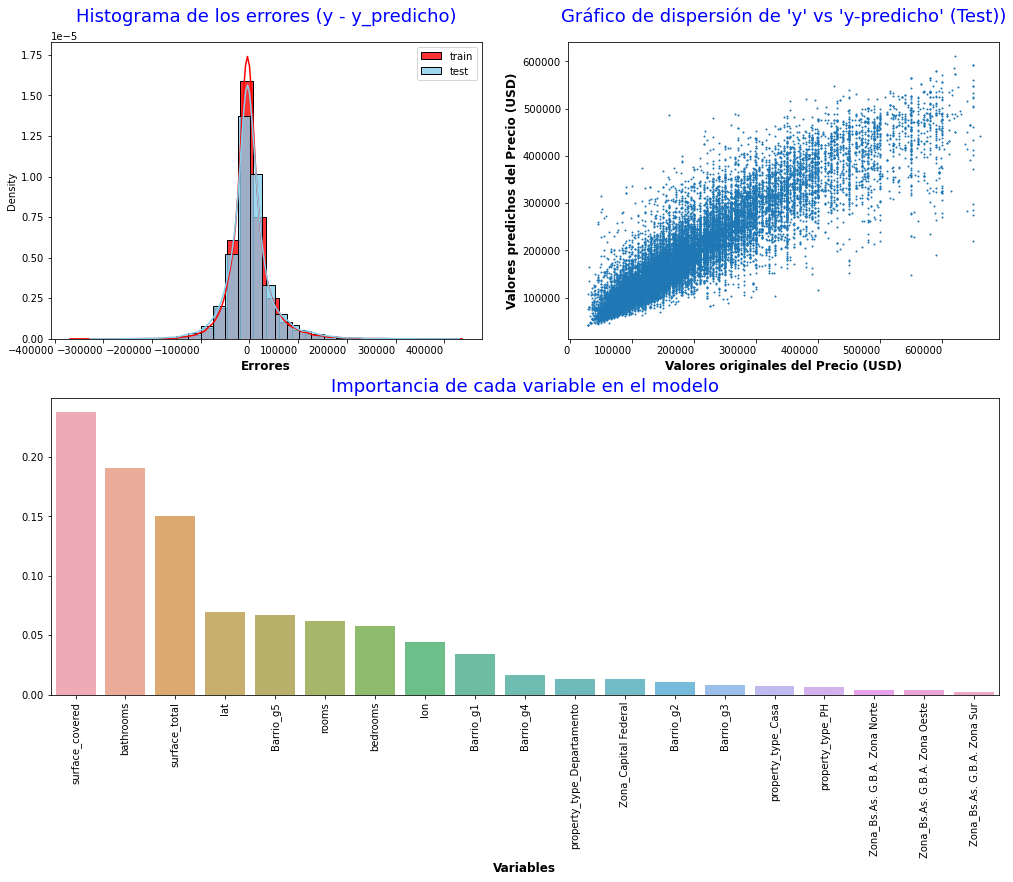

In [432]:
rf_opt,modelo_rf = Aplicar_modelo(x_train, x_test, y_train, y_test,X,  rf, 
                          descrip = "Random Forest Final", 
                          Hparam ={'n_estimators': 250
                          , 'max_features': 15
                          , 'max_depth': 19}, 
                           Cant_Var = "7",
                   importances = True)

In [542]:
rf_opt

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Random Forest Final - HOLD OUT,"{'n_estimators': 250, 'max_features': 15, 'max...",134625,19,41177.586887,46615.848269,27072.485144,30427.254666,0.865767,0.823355


In [339]:
pd.concat([df_tree_ant.loc[:,"Descripción":"rmse_test"],
    df_new_tree.loc[:,"Descripción":"rmse_test"],
    rf_opt.loc[:,"Descripción":"rmse_test"]])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test
0,Sprint 01,{max_depth=9},76771,7,90406.999160,101347.237976
0,Sprint 01 con Transf,{max_depth=9},134625,19,55949.356111,57170.982581
0,Random Forest Final,"{'n_estimators': 250, 'max_features': 15, 'max...",134625,19,41272.176210,46716.388335


Podemos observar una mejora en el desempeño respecto al modelo Benchmark, observando una distribución normal de los errores.
Las variables de mayor importancia al igual que el modelo Benchmark, son la cantidad de baños y la superficie cubierta.

### d.2) XGBOOST Regressor
Como segundo modelo Avanzado utilizaremos XGBOOST 

In [118]:
from xgboost import XGBRegressor
# xmodel = XGBRegressor(n_estimators=200, objective='reg.squarederror')
# XGBOOST = XGBRegressor(n_estimators=200, objective='reg:linear', n_jobs = 8)
XGBOOST = XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs = 8)

In [119]:
xmodel = eval_model_CV (XGBOOST, "XGBOOST_CV","",  x_train, y_train, 4)

xmodel

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,XGBOOST_CV,,107700,19,37502.964866,46007.575366,25559.96293,30078.98403,0.888655,0.832416


In [110]:
pd.concat([xmodel,df_new_tree,rf_opt])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Arbol sin cant. de baños,9,123239,19,35458.583902,42633.696871,24222.338,27891.844837,0.893012,0.8433


#### e.2) Optimizacion HP

Aplicamos Random Search

In [468]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 4)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# max_features = [int(x) for x in np.linspace(start = 4, stop = 10, num = 7)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 105, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
learning_rate = np.linspace(0.01,0.5,num=5)

random_grid = {'n_estimators': n_estimators
              , 'max_features': max_features
              , 'max_depth': max_depth
              , 'learning_rate':learning_rate
              , 'objective': ['reg:squarederror']}
print(random_grid)



{'n_estimators': [100, 233, 366, 500], 'max_features': [5, 6, 7, 8, 'sqrt'], 'max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, None], 'learning_rate': array([0.01  , 0.1325, 0.255 , 0.3775, 0.5   ]), 'objective': ['reg:squarederror']}


In [120]:
# learning_rate entre mas pequeño menos overfitting
learning_rate = [0.05,0.10,0.15,0.20,0.25,0.30,0.45,0.50]
# learning_rate = [0.01,0.0,0.11]



learning_rate =[float(x) for x in np.linspace(start =0.04, stop = 0.08, num = 5)]
# learning_rate = [ 0.08,0.09,0.1]
# learning_rate = [ 0.1]

# learning_rate entre mas pequeño menos overfitting
max_depth = [ 3, 4, 5, 6, 8, 10,11, 12, 15, 16, 17]
# max_depth = [ 12, 13, 14 ]
# max_depth = [13 ]

# min_child_weight entre mas grande mejor overfitting
# min_child_weight = [ 1, 3, 5, 7 ,9]
min_child_weight = [60, 80 , 100]
# min_child_weight = [75]


# learning_rate no afecta en el entrenamiento.
gamma= [0.1 ]
# gamma= ['None']

colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ]

# colsample_bytree = [0.2,  0.3, 0.4 ]
colsample_bytree = [0.4, 0.65 , 0.8]


n_estimators = [int(x) for x in np.linspace(start =50, stop = 550, num = 5)]



random_grid = {
 'learning_rate' : learning_rate,
 'max_depth' : max_depth,
 'min_child_weight' : min_child_weight,
 'gamma': gamma,
 'colsample_bytree' : colsample_bytree,
 'n_estimators' : n_estimators}
print(random_grid)

print(len(learning_rate)*len(max_depth)*len(n_estimators)*len(min_child_weight)*len(gamma)*len(colsample_bytree))

{'learning_rate': [0.04, 0.05, 0.06, 0.07, 0.08], 'max_depth': [3, 4, 5, 6, 8, 10, 11, 12, 15, 16, 17], 'min_child_weight': [60, 80, 100], 'gamma': [0.1], 'colsample_bytree': [0.4, 0.65, 0.8], 'n_estimators': [50, 175, 300, 425, 550]}
2475


In [121]:
XGBmodel = XGBRegressor(objective='reg:squarederror',random_state=42, n_jobs = 8)
# XGBmodel_grid = GridSearchCV(XGBmodel,
#                      param_grid=parameters, 
#                      cv=3, 
#                      scoring = 'neg_mean_absolute_error',
#                      n_jobs = 8,
#                      verbose = True)
# scoring = ['neg_mean_absolute_error','neg_root_mean_squared_error']


XGBmodel_grid = RandomizedSearchCV(XGBmodel,
                     param_distributions= random_grid, 
                     cv=4,
                     n_iter= 10, 
                               scoring = ['neg_mean_absolute_error','neg_root_mean_squared_error'],
                               refit='neg_mean_absolute_error',
                     n_jobs = 8,
                     verbose = True
                     ,return_train_score = True,)

XGBmodel_grid.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                   param_distributions={'colsample_bytree': [0.4, 0.65, 0.8],
                                        'gamma': [0.1],
                                        'learning_rate':

In [122]:
XGBmodel_grid.best_params_

{'n_estimators': 550,
 'min_child_weight': 80,
 'max_depth': 17,
 'learning_rate': 0.06,
 'gamma': 0.1,
 'colsample_bytree': 0.65}

evaluamos el modelo con los mejores hiperparmetros obtenido del Random Search.

In [537]:
# 1	17	0,2	0,3	0,7
# 14	700	80	14	0.08	0.1	0.65
XGBmodel = XGBRegressor(random_state=42,
                            learning_rate= 0.2,
                            max_depth= 17,
                            n_estimators= 550,
                            min_child_weight = 80,
                            colsample_bytree = 0.65,
                            gamma = 0.1,
                            objective ='reg:squarederror',
                            n_jobs = 8
                            )  

In [538]:
xmodel_opt_cv = eval_model_CV (XGBmodel, "XGBOOST opt_cv",
                        {'n_estimators': 550,
                        'min_child_weight': 80,
                        'max_depth': 17,
                        'learning_rate': 0.2,
                        'gamma': 0.1,
                        'colsample_bytree': 0.65}
 ,  x_train, y_train, 4)
xmodel_opt_cv

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,XGBOOST opt_cv,"{'n_estimators': 550, 'min_child_weight': 80, ...",107700,19,31766.288683,43822.979659,20458.905837,27248.529038,0.920108,0.847948


In [539]:
pd.concat([xmodel,xmodel_opt_cv])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,XGBOOST_CV,,107700,19,37502.964866,46007.575366,25559.962930,30078.984030,0.888655,0.832416
0,XGBOOST opt_cv,"{'n_estimators': 550, 'min_child_weight': 80, ...",107700,19,31766.288683,43822.979659,20458.905837,27248.529038,0.920108,0.847948


sin overfitting

In [136]:
resultados = pd.DataFrame(XGBmodel_grid.cv_results_)
resultados["RMSE_Train-RMSE_Test"] = resultados["mean_train_neg_mean_absolute_error"] - resultados["mean_test_neg_mean_absolute_error"]
resultados.sort_values('RMSE_Train-RMSE_Test', ascending = True)
resultados.filter(regex = '(param.*|mean_t|std_t|RMSE)') \
    .drop(columns = 'params') \
    .sort_values(['mean_test_neg_mean_absolute_error', "RMSE_Train-RMSE_Test"], ascending = False) \
    # .tail(10)


,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,RMSE_Train-RMSE_Test
0,550,80,17,0.06,0.1,0.65,-28566.010295,225.067459,-24295.299332,77.812516,-45174.877896,535.874741,-37852.349333,179.653435,4270.710963
7,300,60,17,0.04,0.1,0.4,-29002.280390,257.371589,-25096.447551,75.333366,-45650.643822,584.264147,-39166.045614,147.424034,3905.832839
8,425,100,15,0.07,0.1,0.65,-29502.593422,318.335596,-26012.138173,200.382834,-46186.886941,592.344792,-40231.250575,268.580641,3490.455249
4,300,60,12,0.08,0.1,0.4,-29733.968575,222.502186,-26203.753845,217.943434,-46213.910590,491.858900,-40223.961028,348.702497,3530.214730
6,300,80,12,0.05,0.1,0.65,-30287.906283,247.982998,-27406.373176,93.298269,-46981.755574,531.463655,-42139.824809,175.207401,2881.533107
5,300,60,10,0.06,0.1,0.65,-30355.849788,225.257849,-27466.543997,175.241308,-46810.246677,469.255051,-41836.639787,269.661637,2889.305791
9,425,100,11,0.04,0.1,0.4,-31310.296291,257.613550,-29040.594340,104.862827,-47986.864738,508.443626,-44196.773460,185.450891,2269.701952
3,50,100,16,0.07,0.1,0.8,-31515.895130,236.838340,-29382.766844,67.615827,-49464.761776,555.192613,-46165.935488,135.525962,2133.128286
1,300,100,8,0.06,0.1,0.65,-32432.264688,269.333665,-30721.294078,112.123432,-49037.553191,479.709573,-46105.557253,215.205118,1710.970610
2,175,100,5,0.08,0.1,0.4,-35884.054734,202.410906,-35282.283689,137.832779,-53157.840470,411.659745,-52127.862940,190.672698,601.771044


In [462]:
resultados = pd.DataFrame(XGBmodel_grid.cv_results_)
resultados["RMSE_Train-RMSE_Test"] = resultados["mean_train_neg_mean_absolute_error"] - resultados["mean_test_neg_mean_absolute_error"]
resultados.sort_values('RMSE_Train-RMSE_Test', ascending = True)
resultados.filter(regex = '(param.*|mean_t|std_t|RMSE)') \
    .drop(columns = 'params') \
    .sort_values(['mean_test_neg_mean_absolute_error', "RMSE_Train-RMSE_Test"], ascending = False) \
    .tail(60)
    # .head(50)
    # .tail(60)
    # .head(50)
    

,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error,RMSE_Train-RMSE_Test
4,700,60,14,0.1,0.1,0.8,-24459.495553,343.678926,-19082.180585,353.435220,-41021.125861,690.054219,-30851.345390,659.054215,5377.314967
48,700,60,12,0.1,0.1,0.8,-24840.618467,368.329573,-19871.511973,358.717816,-41343.920939,732.739502,-31930.869773,625.423395,4969.106494
20,700,60,14,0.1,0.1,0.4,-25008.182780,264.635613,-20119.811285,247.330159,-41442.967496,644.728503,-32355.940275,448.078844,4888.371495
5,700,60,13,0.08,0.1,0.65,-25025.593051,336.881236,-20521.607252,268.545481,-41562.894779,676.215711,-33055.642731,478.394519,4503.985799
17,700,60,14,0.08,0.1,0.4,-25168.537541,215.855329,-20529.079246,232.314546,-41638.072745,539.443288,-33074.355526,374.830743,4639.458295
23,700,60,12,0.08,0.1,0.8,-25177.657432,376.042518,-20600.611513,361.527484,-41699.013428,741.325604,-33068.615226,620.283696,4577.045919
10,700,80,14,0.1,0.1,0.65,-25180.155039,308.324292,-20691.888201,88.026108,-41618.500649,657.538215,-33290.975750,150.828241,4488.266839
44,700,80,14,0.09,0.1,0.8,-25207.759792,232.947483,-20635.269996,137.329045,-41685.636328,454.164140,-33179.446321,293.871259,4572.489796
18,700,60,13,0.1,0.1,0.4,-25239.404615,246.899960,-20550.743330,177.953254,-41711.219171,623.871416,-32990.148480,297.645905,4688.661285
13,700,80,13,0.1,0.1,0.8,-25307.125662,284.945080,-20780.976165,118.511552,-41757.709225,599.079450,-33295.120219,261.016284,4526.149497


In [433]:
# 14	700	80	14	0.08	0.1	0.65
XGBmodel = XGBRegressor(random_state=42,
                            n_estimators= 700,
                            min_child_weight = 80,
                            max_depth= 14,
                            learning_rate= 0.08,
                            gamma = 0.1,                            
                            colsample_bytree = 0.65,
                            
                            objective ='reg:squarederror',
                            n_jobs = 8
                            )  

In [541]:
xmodel_opt_cv_sin_of = eval_model_CV (XGBmodel, "XGBOOST opt_cv sin of",
                        {'n_estimators': 700,
                        'min_child_weight': 80,
                        'max_depth': 14,
                        'learning_rate': 0.08,
                        'gamma': 0.1,
                        'colsample_bytree': 0.65}
 ,  x_train, y_train, 4)
xmodel_opt_cv_sin_of

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,XGBOOST opt_cv sin of,"{'n_estimators': 700, 'min_child_weight': 80, ...",107700,19,36938.218766,44869.947718,23849.099478,28406.735813,0.891979,0.840601


In [542]:
pd.concat([xmodel,xmodel_opt_cv,xmodel_opt_cv_sin_of])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,XGBOOST_CV,,107700,19,37502.964866,46007.575366,25559.962930,30078.984030,0.888655,0.832416
0,XGBOOST opt_cv,"{'n_estimators': 550, 'min_child_weight': 80, ...",107700,19,31766.288683,43822.979659,20458.905837,27248.529038,0.920108,0.847948
0,XGBOOST opt_cv sin of,"{'n_estimators': 700, 'min_child_weight': 80, ...",107700,19,36938.218766,44869.947718,23849.099478,28406.735813,0.891979,0.840601


Evaluamos el modelo final con el Hold Out

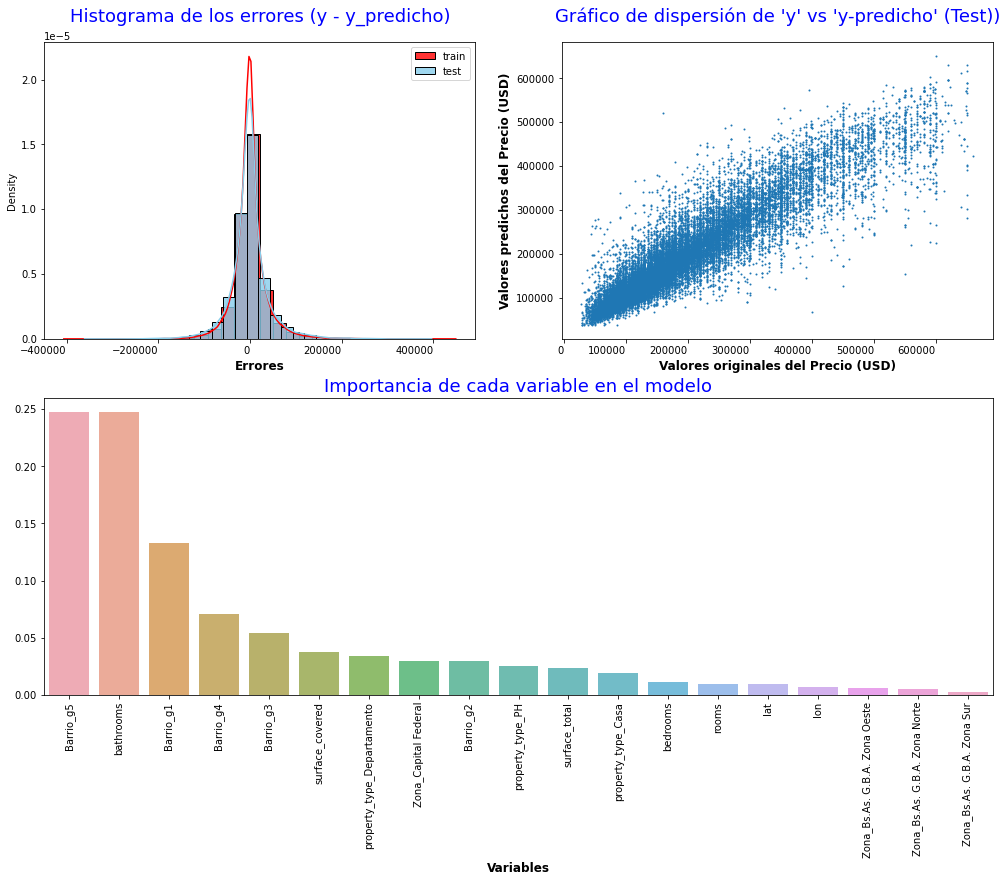

In [434]:
xmodel_opt, modelo_xmodel = Aplicar_modelo(x_train, x_test, y_train, y_test,X,  XGBmodel, 
                          descrip = "XGBOOST Final",
                          Hparam ={'n_estimators': 700,
                          'min_child_weight': 80,
                          'max_depth': 14,
                          'learning_rate': 0.08,
                          'gamma': 0.1,
                          'colsample_bytree': 0.65}, 
                           Cant_Var = "19",
                   importances = True)

In [142]:
xmodel_opt

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,XGBOOST Final,"{'n_estimators': 700, 'min_child_weight': 80, ...",134625,19,36433.16786,42992.976713,23331.600667,27311.119695,0.894918,0.849745


A diferencias de los dos modelos anteriores las variables de mayor importancia la variable con mayor importancia paso a ser la obtenida en la agrupación de los  barrios por la media del m2.

In [340]:
pd.concat([df_tree_ant.loc[:,"Descripción":"rmse_test"],
df_new_tree.loc[:,"Descripción":"rmse_test"],
xmodel_opt.loc[:,"Descripción":"rmse_test"]])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test
0,Sprint 01,{max_depth=9},76771,7,90406.999160,101347.237976
0,Sprint 01 con Transf,{max_depth=9},134625,19,55949.356111,57170.982581
0,XGBOOST Final,"{'n_estimators': 700, 'min_child_weight': 80, ...",134625,19,36433.167860,42992.976713


### f) Comparación de los modelos obtenidos.

In [341]:
pd.concat([df_new_tree.loc[:,"Descripción":"rmse_test"],
    rf_opt.loc[:,"Descripción":"rmse_test"],
    xmodel_opt.loc[:,"Descripción":"rmse_test"]])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test
0,Sprint 01 con Transf,{max_depth=9},134625,19,55949.356111,57170.982581
0,Random Forest Final,"{'n_estimators': 250, 'max_features': 15, 'max...",134625,19,41272.176210,46716.388335
0,XGBOOST Final,"{'n_estimators': 700, 'min_child_weight': 80, ...",134625,19,36433.167860,42992.976713


Como ya se había descrito el modelo que mejor desempeño obtuvo fue el realizado con XGBOOST Regressor, el cual obtuvo una mejora de ~25% respecto al modelo Benchmark, por lo cual es el elegido como mejor modelo.

Cabe destacar, que este modelo requiere un poco más recursos computaciones, por lo que hay que tenerlo en cuenta en caso de implementaciones.

## Adicional 

### Regresion lineal - PolynomialFeatures-PCA


Para probar una nueva transformacion utilizamos el modelo de Regrsion lineal con PolynomialFeatures y lo compararemos con PCA.

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [166]:
from sklearn.decomposition import TruncatedSVD, PCA
from scipy.sparse import csr_matrix
import numpy as np

poly = PolynomialFeatures(2, include_bias=False, interaction_only= False, order= 'C')

X_new = poly.fit_transform(X_escalado)
X_new.shape

# svd = PCA(n_components=  60)
# svd.fit(X_new)
# X_new = svd.fit_transform(X_new)
# # print(svd.explained_variance_ratio_)

# print(svd.explained_variance_ratio_.sum())

x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
# print(svd.singular_values_)

In [167]:
X_new.shape

(134625, 209)

In [169]:
modelLinear = LinearRegression(n_jobs = 8)
# y_predict_linear =  modelLinear.predict(x_test)


modelLinear_cv_g2 = eval_model_CV (modelLinear, "Regresión Lineal grado 2_CV","",  x_train, y_train, 4)


In [170]:
modelLinear_cv_g2

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Regresión Lineal grado 2_CV,,107700,209,57744.647822,57916.138456,39228.877007,39313.164715,0.736025,0.734443


In [281]:
from sklearn.decomposition import TruncatedSVD, PCA
from scipy.sparse import csr_matrix
import numpy as np

poly = PolynomialFeatures(3, include_bias=False, interaction_only= False, order= 'C')

X_new = poly.fit_transform(X_escalado)
X_new.shape

# svd = PCA(n_components=  60)
# svd.fit(X_new)
# X_new = svd.fit_transform(X_new)
# # print(svd.explained_variance_ratio_)

# print(svd.explained_variance_ratio_.sum())

x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
# print(svd.singular_values_)

In [172]:
X_new.shape

(134625, 1539)

In [282]:
modelLinear = LinearRegression(n_jobs = 8)
# y_predict_linear =  modelLinear.predict(x_test)


modelLinear_cv_g3 = eval_model_CV (modelLinear, "Regresión Lineal grado 3_CV","",  x_train, y_train, 4)


In [174]:
modelLinear_cv_g3

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Regresión Lineal grado 3_CV,,107700,1539,54726.032968,55834.003883,37059.979187,37538.101332,0.762903,0.753198


In [175]:
from sklearn.decomposition import TruncatedSVD, PCA
from scipy.sparse import csr_matrix
import numpy as np

poly = PolynomialFeatures(4, include_bias=False, interaction_only= False, order= 'C')

X_new = poly.fit_transform(X_escalado)
X_new.shape

# svd = PCA(n_components=  60)
# svd.fit(X_new)
# X_new = svd.fit_transform(X_new)
# # print(svd.explained_variance_ratio_)

# print(svd.explained_variance_ratio_.sum())

x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
# print(svd.singular_values_)

In [176]:
X_new.shape

(134625, 8854)

In [177]:
modelLinear = LinearRegression(n_jobs = 8)
# y_predict_linear =  modelLinear.predict(x_test)


modelLinear_cv_g4 = eval_model_CV (modelLinear, "Regresión Lineal grado 4_CV","",  x_train, y_train, 4)


In [179]:
modelLinear_cv_g4

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Regresión Lineal grado 4_CV,,107700,8854,51370.431062,59171.434336,34862.346137,36889.905298,0.791087,0.722548


In [283]:
pd.concat([modelLinear_cv_g2,modelLinear_cv_g3,modelLinear_cv_g4])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Regresión Lineal grado 2_CV,,107700,209,57744.647822,57916.138456,39228.877007,39313.164715,0.736025,0.734443
0,Regresión Lineal grado 3_CV,,107700,1539,54726.032968,55834.003883,37059.979187,37538.101332,0.762903,0.753198
0,Regresión Lineal grado 4_CV,,107700,8854,51370.431062,59171.434336,34862.346137,36889.905298,0.791087,0.722548


nos quedamos con el modelo de grado 3, ya que el de grado 4 empieza a presentar una mayor varianza.

Probamos con PCA

In [546]:
from sklearn.decomposition import TruncatedSVD, PCA
from scipy.sparse import csr_matrix
import numpy as np

poly = PolynomialFeatures(3, include_bias=False, interaction_only= False, order= 'C')

X_new = poly.fit_transform(X_escalado)
X_new.shape

svd = PCA(n_components=  60)
svd.fit(X_new)
X_new = svd.fit_transform(X_new)
# print(svd.explained_variance_ratio_)

print(svd.explained_variance_ratio_.sum())

x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
# print(svd.singular_values_)

0.9778601776984314


Nos quedamos con 60 donde tenemos un 97,78% de variance

In [547]:
modelLinear = LinearRegression(n_jobs = 8)
# y_predict_linear =  modelLinear.predict(x_test)


modelLinear_cv_g3_PCA = eval_model_CV (modelLinear, "Regresión Lineal grado 3 PCA_CV","",  x_train, y_train, 4)

In [548]:
modelLinear_cv_g3_PCA

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,Regresión Lineal grado 3 PCA_CV,,107700,60,73096.142784,73412.725033,51986.230056,52080.387684,0.577012,0.573324


Podemos observar que, al aplicar la reducción de dimensionalidad al PolynomialFeatures de grado 3 aumentamos la precisión, pero disminuimos la exactitud del modelo.


### imputacion por KNN


In [440]:
print(df.shape)
df_knn = dfs.copy()
df_dropna = dfs.dropna()
# df = dfs2.copy()
print(df_knn.shape)
print(df_dropna.shape)
# df_knn.describe()

(134625, 20)
(143145, 11)
(101341, 11)


In [441]:
df_knn.isna().sum() * 100 / df_knn.isna().count()

lat                 6.707185
lon                 6.728841
Zona                0.000000
Barrio              0.000000
rooms               2.243180
bedrooms            3.573300
bathrooms           5.794125
surface_total      17.532572
surface_covered    17.713507
price               5.254812
property_type       0.000000
dtype: float64

In [442]:
# df_knn.dropna(subset=["price"], inplace=True)
df_knn.dropna(subset=["rooms","bedrooms"], thresh=1, inplace=True)
# df_knn.dropna(subset=["rooms","bedrooms"], inplace=True)
print(df_knn.shape)
df_knn.isna().sum() * 100 / df_knn.isna().count()

(141161, 11)


lat                 6.684566
lon                 6.706527
Zona                0.000000
Barrio              0.000000
rooms               0.869220
bedrooms            2.218035
bathrooms           5.348503
surface_total      16.895601
surface_covered    16.955816
price               4.630174
property_type       0.000000
dtype: float64

Se eliminan los valores faltantes de la variable objetivo y del surface_total debido a que esta se usa para obtener los grupos los barrios por el promedio del precio por m2.

In [443]:
df_knn.dropna(subset=["price","surface_total"], inplace=True)
# df_knn.dropna(subset=["rooms","bedrooms"], thresh=1, inplace=True)
# df_knn.dropna(subset=["rooms","bedrooms"], inplace=True)
print(df_knn.shape)
df_knn.isna().sum() * 100 / df_knn.isna().count()

(113996, 11)


lat                6.360749
lon                6.360749
Zona               0.000000
Barrio             0.000000
rooms              0.459665
bedrooms           1.400049
bathrooms          2.345696
surface_total      0.000000
surface_covered    1.471981
price              0.000000
property_type      0.000000
dtype: float64

In [444]:
df_knn = pd.get_dummies(df_knn, columns=["property_type"])

df_knn["m2"]  = df_knn.price / df_knn.surface_total 

media = df_knn[["m2","Barrio"]].groupby("Barrio").agg(pd.Series.mean)
media = media.to_dict()["m2"]
media

df_knn.Barrio = df_knn.Barrio.map(media)
df_knn.drop(columns=['m2'], inplace=True)

df_knn["Barrio"] = pd.qcut(df_knn.Barrio,5,labels=["g1","g2","g3","g4","g5"])
# df_knn["Barrio"]

df_knn = pd.get_dummies(df_knn, columns=["Barrio","Zona"])


df_knn.dropna(subset=["price"], inplace=True)

print(df_knn.shape)
print(df.shape)

(113996, 20)
(134625, 20)


In [445]:
print(df.shape)

(134625, 20)


In [446]:
X = df_knn.drop(columns=["price"])
col = X.columns
y = df_knn.price


from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_imputer = imputer.fit_transform(X)

X_escalado = escalador.fit_transform(X_imputer)
# X_escalado = X
X_escalado
x_train, x_test, y_train, y_test = train_test_split(X_escalado, y, test_size = 0.2, random_state = 42)


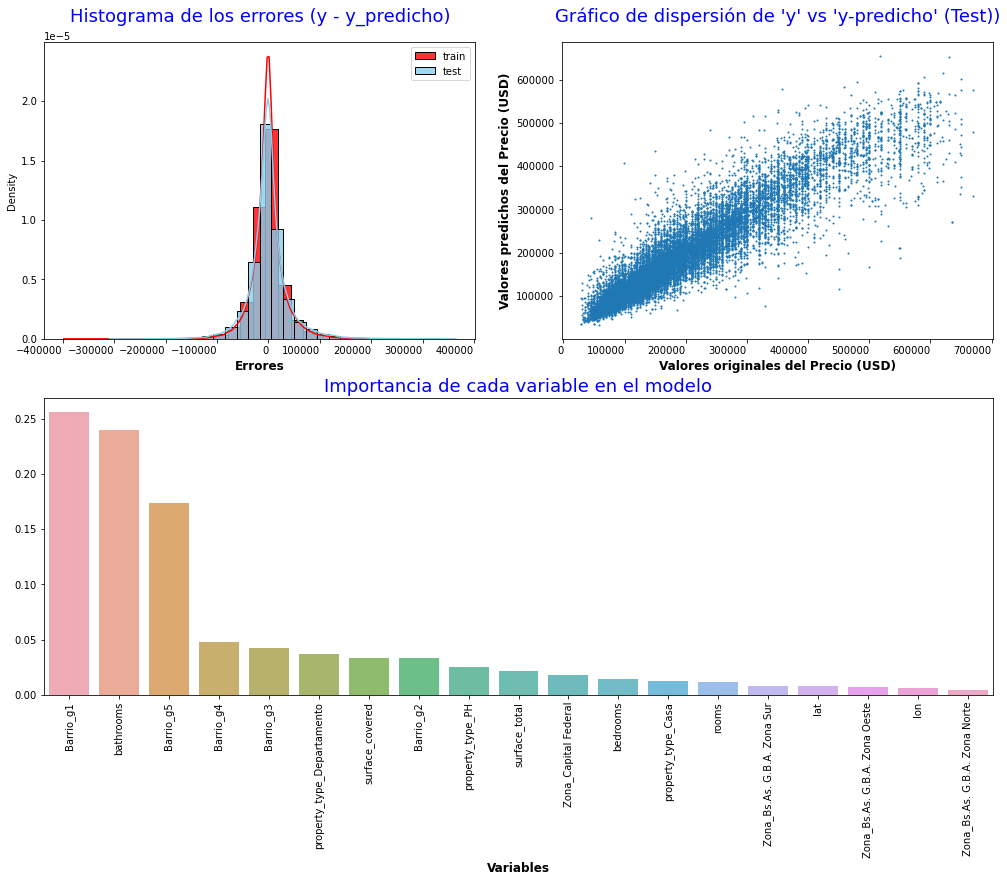

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,XGBmodel_KNN,{},113996,19,32174.078253,39699.625675,21042.992054,25100.191546,0.912781,0.866868


In [447]:
XGBmodel = XGBRegressor(random_state=42,
                            n_estimators= 700,
                            min_child_weight = 80,
                            max_depth= 14,
                            learning_rate= 0.08,
                            gamma = 0.1,                            
                            colsample_bytree = 0.65,
                            
                            objective ='reg:squarederror',
                            n_jobs = 8
                            )    


# rf_knn = eval_model_CV (XGBmodel, "Random Forest","",  x_train, y_train, 4)

rf_knn , modelo_knn= Aplicar_modelo(x_train, x_test, y_train, y_test, X, XGBmodel, 
                          descrip = "XGBmodel_KNN", Hparam ={}, Cant_Var = "7",
                   importances = True)

rf_knn

In [448]:
modelo_knn

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.65, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=14,
             min_child_weight=80, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Creamos un modelo con las mismas transformaciones, pero sin imputar los faltantes.

In [449]:
df_dropna = pd.get_dummies(df_dropna, columns=["property_type"])

df_dropna["m2"]  = df_dropna.price / df_dropna.surface_total 

media = df_dropna[["m2","Barrio"]].groupby("Barrio").agg(pd.Series.mean)
media = media.to_dict()["m2"]
media

df_dropna.Barrio = df_dropna.Barrio.map(media)
df_dropna.drop(columns=['m2'], inplace=True)

df_dropna["Barrio"] = pd.qcut(df_dropna.Barrio,5,labels=["g1","g2","g3","g4","g5"])
# df_dropna["Barrio"]

df_dropna = pd.get_dummies(df_dropna, columns=["Barrio","Zona"])


df_dropna.dropna(subset=["price"], inplace=True)

print(df_dropna.shape)
print(df.shape)

(101341, 20)
(134625, 20)


In [450]:
X = df_dropna.drop(columns=["price"])
col = X.columns
y = df_dropna.price

X_escalado = X
X_escalado
x_train, x_test, y_train, y_test = train_test_split(X_escalado, y, test_size = 0.2, random_state = 42)


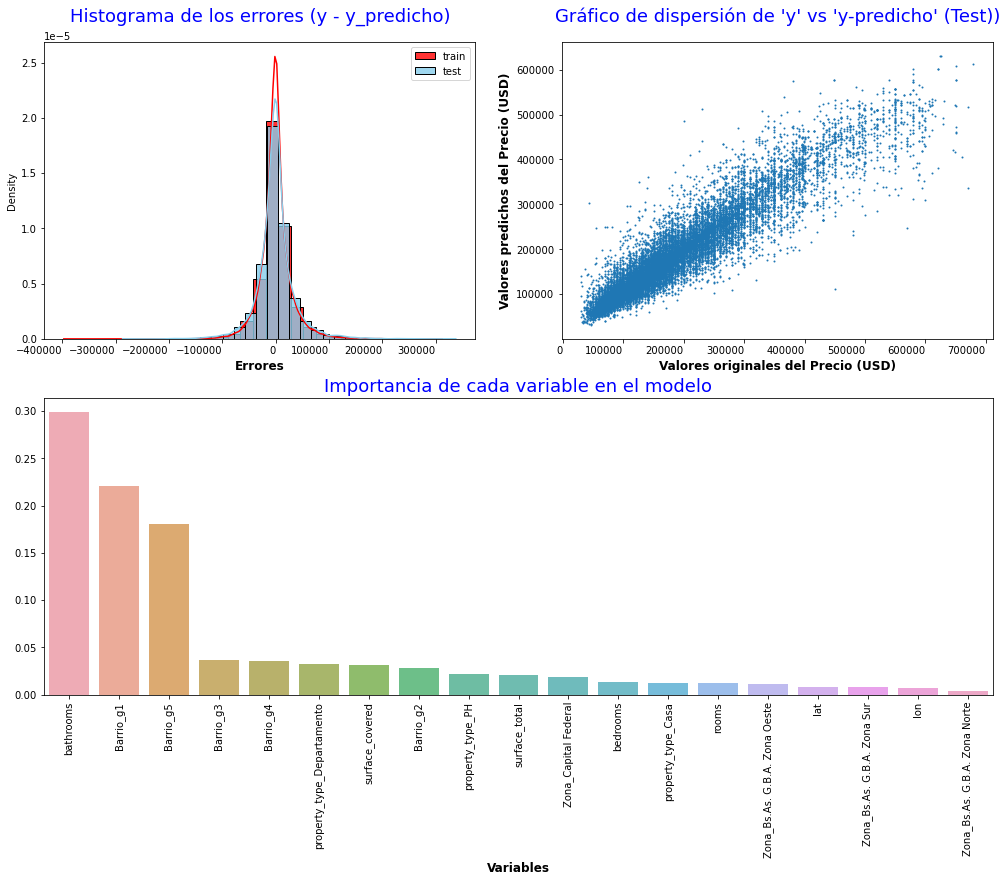

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,XGBmodel_dropna,{},101341,19,29435.40739,36057.308217,19350.237871,23004.739429,0.918985,0.878418


In [451]:
XGBmodel = XGBRegressor(random_state=42,
                            n_estimators= 700,
                            min_child_weight = 80,
                            max_depth= 14,
                            learning_rate= 0.08,
                            gamma = 0.1,                            
                            colsample_bytree = 0.65,
                            
                            objective ='reg:squarederror',
                            n_jobs = 8
                            )    


# rf_knn = eval_model_CV (XGBmodel, "Random Forest","",  x_train, y_train, 4)

rf_dropna, modelo_dropna = Aplicar_modelo(x_train, x_test, y_train, y_test, X, XGBmodel, 
                          descrip = "XGBmodel_dropna", Hparam ={}, Cant_Var = "7",
                   importances = True)

rf_dropna

In [452]:
pd.concat([xmodel_opt,rf_knn,rf_dropna])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test,MAE Train,MAE Test,R2_train,R2_test
0,XGBOOST Final,"{'n_estimators': 700, 'min_child_weight': 80, ...",134625,19,36433.167860,42992.976713,23331.600667,27311.119695,0.894918,0.849745
0,XGBmodel_KNN,{},113996,19,32174.078253,39699.625675,21042.992054,25100.191546,0.912781,0.866868
0,XGBmodel_dropna,{},101341,19,29435.407390,36057.308217,19350.237871,23004.739429,0.918985,0.878418


Al realizar la imputación de los datos atreves del modelo de KNN obtenemos una mejora en el desempeño.

Aun que debemos tener en cuenta que para poder hacer uso se de este método tuvimos que eliminar los valores nulos de la columna de superficie cubierta, ya que se debió primero realizar la transformación de los datos, en especial el Encoding de las variables no numéricas, para poder si hacer uso de este método.


# Interpretacion de Modelos

Interpretaremos los modelos avanzados utilizados, RandomForestRegressor y XGBRegressor, y lo compararemos con el modelo Benchmark, un simple árbol de decisión.

## g) Interpretacion de Modelos

#### Variables más importante y menos importante
Empezaremos identificando las variables más importante y menos importante para cada uno de los modelos utilizados.
Para eso utilizaremos el siguiente grafico:


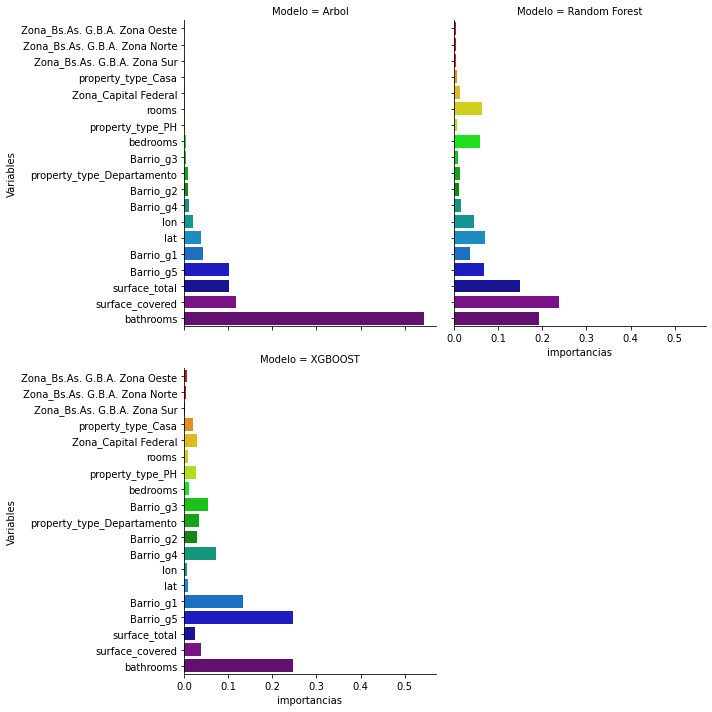

In [537]:
sns.catplot(data = pd.concat([
                pd.DataFrame({
                'Modelo': 'Arbol',
                "Variables": X.columns,
                "importancias": modelo_tree_1.feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'Random Forest',
                    "Variables": X.columns,
                    "importancias": modelo_rf.feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'XGBOOST',
                    "Variables": X.columns,
                    "importancias": modelo_xmodel.feature_importances_}).sort_values("importancias", ascending= True)
                
                ]),
            y= 'Variables',
            x= 'importancias',
            kind= 'bar',
            col= 'Modelo',
            col_wrap=2, 
            palette= "nipy_spectral_r")

Mayor importancia: 
- Podemos observar que una de las variables más importante en los modelos avanzados, es la cantidad de baños de la propiedad (**bathrooms**), el mismo caso para con el modelo Benchmark. lo cual no me esperaba, ya que en el sprint 1 fue la variable con menor correlación con el precio.

- Por otro lado, el Random Forest, tiene como variable más importante (**surface_covered**), lo cual tiene un poco más de sentido. ya que se había identificado en el sprint 1 que era una de las variables que más correlación tenía con la variable objetivo.

- También podemos ver, en el modelo XGBOOST la variable Barrio_g5 es la que tiene mayor importancia. la cual obtuvimos del Encoding de la columna barrio agrupándolos por la media del del precio por m2 por barrio.

Menor importancia:
- podemos observar que las variables con menor importancia en los tres modelos han sido las obtenida del Encoding de la columna Zona.


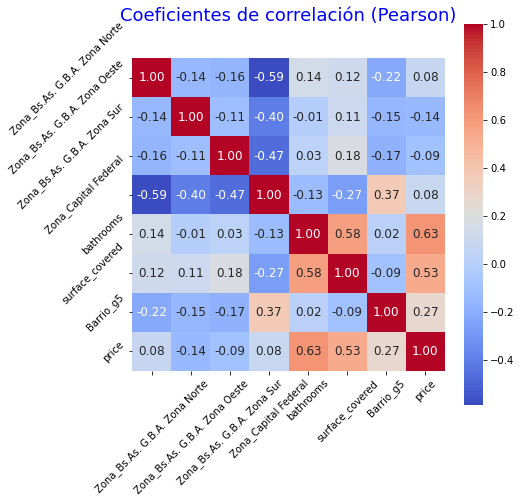

In [ ]:
plt.figure(figsize = (7,7))
sns.heatmap(df[['Zona_Bs.As. G.B.A. Zona Norte',
       'Zona_Bs.As. G.B.A. Zona Oeste', 'Zona_Bs.As. G.B.A. Zona Sur',
       'Zona_Capital Federal','bathrooms','surface_covered','Barrio_g5','price']].corr(),
            cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 12}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "b", y = 1.1)
plt.show()

Observando la matriz de correlación podemos corroborar la alta correlación que tiene la variable bathrooms con la variable precio una vez realizado el preprocesamiento de los datos.

#### Variables más importantes en arboles obtenidos al azar (Random Forest)

Observamos 6 gráficos al azar.

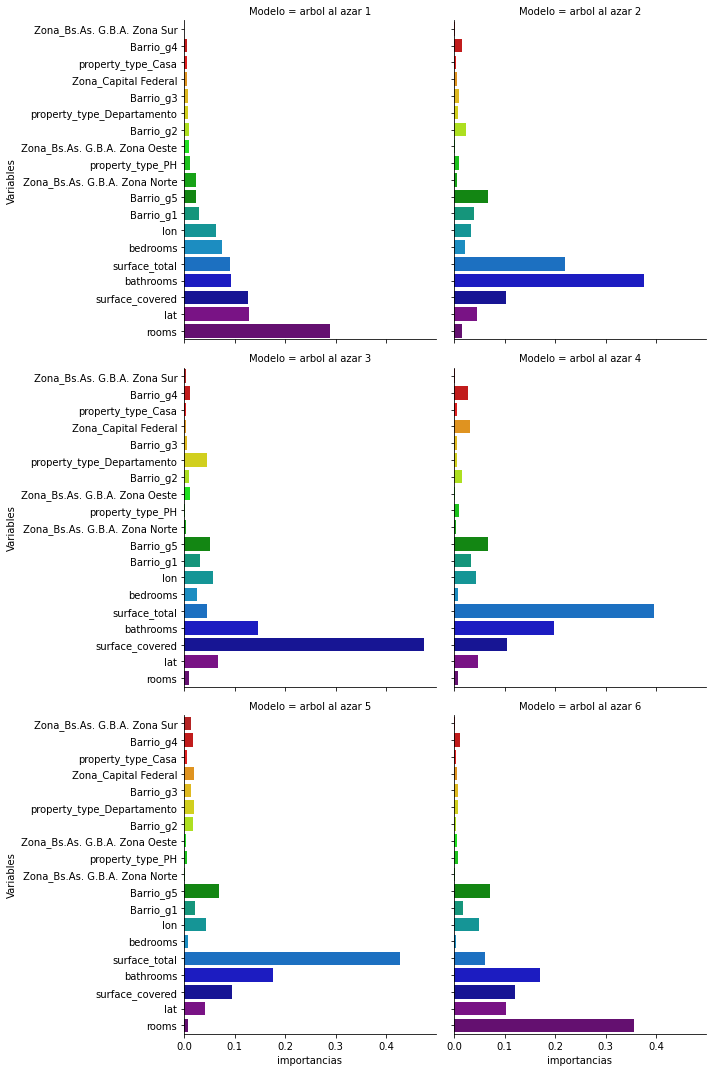

In [ ]:
sns.catplot(data = pd.concat([
                pd.DataFrame({
                'Modelo': 'arbol al azar 1',
                "Variables": X.columns,
                "importancias": modelo_rf.estimators_[pd.DataFrame(modelo_rf.estimators_).sample(4).index[0]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'arbol al azar 2',
                    "Variables": X.columns,
                    "importancias": modelo_rf.estimators_[pd.DataFrame(modelo_rf.estimators_).sample(4).index[1]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'arbol al azar 3',
                    "Variables": X.columns,
                    "importancias": modelo_rf.estimators_[pd.DataFrame(modelo_rf.estimators_).sample(4).index[2]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'arbol al azar 4',
                    "Variables": X.columns,
                    "importancias": modelo_rf.estimators_[pd.DataFrame(modelo_rf.estimators_).sample(4).index[3]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'arbol al azar 5',
                    "Variables": X.columns,
                    "importancias": modelo_rf.estimators_[pd.DataFrame(modelo_rf.estimators_).sample(5).index[4]].feature_importances_}).sort_values("importancias", ascending= True),
                pd.DataFrame({
                    'Modelo': 'arbol al azar 6',
                    "Variables": X.columns,
                    "importancias": modelo_rf.estimators_[pd.DataFrame(modelo_rf.estimators_).sample(6).index[5]].feature_importances_}).sort_values("importancias", ascending= True)
                             
                
                
                
                ]),
            y= 'Variables',
            x= 'importancias',
            kind= 'bar',
            col= 'Modelo',
            col_wrap=2, 
            palette= "nipy_spectral_r")   

Como era de esperarse cada uno de los árboles que se tomaron de manera aleatoria del modelo tienen distintos niveles de importancia a cada una de las variables. ya que los input que para entrenar cada uno de ellos es distinta, esto es lo que hace que esa uno de los modelos más potentes.

### h) Interpretación de los errores

Para evaluar los modelos se utilizó el RMSE, ya que este es más sensible que el MAE.

En todos los modelos evaluado se observó en el histograma una distribución normal de los errores.

Pero si observamos a detalle el grafico de dispersión se puede observar que a los valores más pequeño del precio el modelo tiende a sobreestimar la predicción, caso contrario en los valores más grandes del precio, donde el modelo tiende a subestimar la predicción respecto al valor real en las instancias de prueba.

# Cierre

Para cerrar, podemos concluir que la metodología utilizada logro reducir el RMSE obtenido en el test con respecto al modelo utilizado en el primer sprint un 43,5%, esto con solo hacer uso de las herramienta y recursos disponibles para transformar los datos. Lo cual demuestra la importancia de su aplicación.

In [ ]:
pd.concat([df_tree_ant.loc[:,"Descripción":"rmse_test"],df_new_tree.loc[:,"Descripción":"rmse_test"]])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test
0,Sprint 01,{max_depth=9},76771,7,90406.999160,101347.237976
0,Sprint 01 con Transf,{max_depth=9},134625,19,55949.356111,57170.982581


Además, con la utilización de los modelos avanzado, y las herramientas de validación cruzada (CV) y Random Search, se logró mejorar el RMSE un 24,7% respecto al modelo Benchmark.

In [ ]:
pd.concat([df_new_tree.loc[:,"Descripción":"rmse_test"],xmodel_opt.loc[:,"Descripción":"rmse_test"]])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test
0,Sprint 01 con Transf,{max_depth=9},134625,19,55949.356111,57170.982581
0,XGBOOST Final,"{'n_estimators': 700, 'min_child_weight': 80, ...",134625,19,36433.167860,42992.976713


Logrando una mejora respecto al primer sprint de una 57,5%. dejando así en evidencia la gran importancia del preprocesamiento de los datos, ya que representa al rededor del 75% de la mejora obtenida.

Cabe destacar, que consideraría se podría mejorar el modelo si s realizan un trabajo un trabajo más profundo en el preprocesamiento de datos. ya que al probar la imputación de datos faltantes por medios de KNN, se logró una pequeña mejora del modelo; como también realizar otra metodología para tratar lo outlier y valores faltantes, ya al eliminarlos directamente del modelo, este también mejor respecto al modelo finalmente elegido.


In [ ]:
pd.concat([xmodel_opt.loc[:,"Descripción":"rmse_test"],
    rf_knn.loc[:,"Descripción":"rmse_test"],
    rf_dropna.loc[:,"Descripción":"rmse_test"]])

,Descripción,Hparam,Cant Instancias,Cant Variables,rmse_train,rmse_test
0,XGBOOST Final,"{'n_estimators': 700, 'min_child_weight': 80, ...",134625,19,36433.167860,42992.976713
0,XGBmodel_KNN,{},113996,19,32174.078253,39699.625675
0,XGBmodel_dropna,{},101341,19,29435.407390,36057.308217
